<a href="https://colab.research.google.com/github/Rahad31/Different-VAE-for-KL-FedDis/blob/main/VAE_KL_fedDis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


\begin{array}{|c|c|c|}
\hline
\textbf{$\beta$ Value} & \textbf{250 Epochs} & \textbf{500 Epochs} \\
\hline
0.1   & 59.94 & 00000 \\
0.5   & 60.64 & 61.05 \\
1.0   & 59.80 & 61.85 \\
2.0   & 60.72 & 61.08 \\
3.0   & 59.66 & 60.91 \\
4.0   & 59.75 & 59.44 \\
5.0   & 60.77 & 62.68 \\
10.0  & 59.97 & 59.18 \\
\hline
\end{array}
'''




In [3]:
import re

# Your provided text
log = """
Epoch [1/10], Training Loss: 2.303, Validation Accuracy: 11.01%
Epoch [2/10], Training Loss: 2.302, Validation Accuracy: 10.74%
Epoch [3/10], Training Loss: 2.302, Validation Accuracy: 10.61%
Epoch [4/10], Training Loss: 2.300, Validation Accuracy: 11.70%
Epoch [5/10], Training Loss: 2.300, Validation Accuracy: 12.33%
Epoch [6/10], Training Loss: 2.299, Validation Accuracy: 12.45%
Epoch [7/10], Training Loss: 2.297, Validation Accuracy: 12.48%
Epoch [8/10], Training Loss: 2.296, Validation Accuracy: 12.57%
Epoch [9/10], Training Loss: 2.294, Validation Accuracy: 12.95%
Epoch [10/10], Training Loss: 2.292, Validation Accuracy: 13.12%
Epoch [1/10], Training Loss: 2.293, Validation Accuracy: 13.94%
Epoch [2/10], Training Loss: 2.289, Validation Accuracy: 16.14%
Epoch [3/10], Training Loss: 2.284, Validation Accuracy: 17.23%
Epoch [4/10], Training Loss: 2.277, Validation Accuracy: 17.38%
Epoch [5/10], Training Loss: 2.266, Validation Accuracy: 16.99%
Epoch [6/10], Training Loss: 2.248, Validation Accuracy: 17.14%
Epoch [7/10], Training Loss: 2.223, Validation Accuracy: 17.38%
Epoch [8/10], Training Loss: 2.190, Validation Accuracy: 19.22%
Epoch [9/10], Training Loss: 2.160, Validation Accuracy: 22.01%
Epoch [10/10], Training Loss: 2.140, Validation Accuracy: 23.64%
Epoch [1/10], Training Loss: 2.131, Validation Accuracy: 23.91%
Epoch [2/10], Training Loss: 2.113, Validation Accuracy: 24.43%
Epoch [3/10], Training Loss: 2.095, Validation Accuracy: 26.28%
Epoch [4/10], Training Loss: 2.074, Validation Accuracy: 26.21%
Epoch [5/10], Training Loss: 2.055, Validation Accuracy: 27.07%
Epoch [6/10], Training Loss: 2.039, Validation Accuracy: 27.76%
Epoch [7/10], Training Loss: 2.020, Validation Accuracy: 28.23%
Epoch [8/10], Training Loss: 1.998, Validation Accuracy: 29.66%
Epoch [9/10], Training Loss: 1.978, Validation Accuracy: 30.13%
Epoch [10/10], Training Loss: 1.950, Validation Accuracy: 31.39%
Epoch [1/10], Training Loss: 1.935, Validation Accuracy: 32.15%
Epoch [2/10], Training Loss: 1.907, Validation Accuracy: 32.73%
Epoch [3/10], Training Loss: 1.886, Validation Accuracy: 32.46%
Epoch [4/10], Training Loss: 1.867, Validation Accuracy: 33.32%
Epoch [5/10], Training Loss: 1.849, Validation Accuracy: 34.13%
Epoch [6/10], Training Loss: 1.829, Validation Accuracy: 35.07%
Epoch [7/10], Training Loss: 1.815, Validation Accuracy: 35.68%
Epoch [8/10], Training Loss: 1.799, Validation Accuracy: 35.71%
Epoch [9/10], Training Loss: 1.779, Validation Accuracy: 36.21%
Epoch [10/10], Training Loss: 1.765, Validation Accuracy: 36.88%
Epoch [1/10], Training Loss: 1.770, Validation Accuracy: 36.96%
Epoch [2/10], Training Loss: 1.745, Validation Accuracy: 37.89%
Epoch [3/10], Training Loss: 1.727, Validation Accuracy: 38.23%
Epoch [4/10], Training Loss: 1.709, Validation Accuracy: 38.58%
Epoch [5/10], Training Loss: 1.694, Validation Accuracy: 38.86%
Epoch [6/10], Training Loss: 1.681, Validation Accuracy: 39.11%
Epoch [7/10], Training Loss: 1.661, Validation Accuracy: 39.84%
Epoch [8/10], Training Loss: 1.649, Validation Accuracy: 40.70%
Epoch [9/10], Training Loss: 1.636, Validation Accuracy: 40.30%
Epoch [10/10], Training Loss: 1.629, Validation Accuracy: 41.09%
Epoch [1/10], Training Loss: 1.640, Validation Accuracy: 41.48%
Epoch [2/10], Training Loss: 1.621, Validation Accuracy: 41.56%
Epoch [3/10], Training Loss: 1.615, Validation Accuracy: 41.96%
Epoch [4/10], Training Loss: 1.608, Validation Accuracy: 41.95%
Epoch [5/10], Training Loss: 1.596, Validation Accuracy: 41.47%
Epoch [6/10], Training Loss: 1.582, Validation Accuracy: 42.15%
Epoch [7/10], Training Loss: 1.570, Validation Accuracy: 42.99%
Epoch [8/10], Training Loss: 1.563, Validation Accuracy: 43.63%
Epoch [9/10], Training Loss: 1.554, Validation Accuracy: 43.04%
Epoch [10/10], Training Loss: 1.548, Validation Accuracy: 42.67%
Epoch [1/10], Training Loss: 1.573, Validation Accuracy: 44.40%
Epoch [2/10], Training Loss: 1.556, Validation Accuracy: 44.65%
Epoch [3/10], Training Loss: 1.545, Validation Accuracy: 44.29%
Epoch [4/10], Training Loss: 1.534, Validation Accuracy: 44.69%
Epoch [5/10], Training Loss: 1.527, Validation Accuracy: 45.31%
Epoch [6/10], Training Loss: 1.521, Validation Accuracy: 44.85%
Epoch [7/10], Training Loss: 1.504, Validation Accuracy: 43.16%
Epoch [8/10], Training Loss: 1.495, Validation Accuracy: 45.49%
Epoch [9/10], Training Loss: 1.482, Validation Accuracy: 44.78%
Epoch [10/10], Training Loss: 1.479, Validation Accuracy: 46.25%
Epoch [1/10], Training Loss: 1.482, Validation Accuracy: 46.94%
Epoch [2/10], Training Loss: 1.463, Validation Accuracy: 46.25%
Epoch [3/10], Training Loss: 1.449, Validation Accuracy: 46.87%
Epoch [4/10], Training Loss: 1.440, Validation Accuracy: 46.76%
Epoch [5/10], Training Loss: 1.437, Validation Accuracy: 46.78%
Epoch [6/10], Training Loss: 1.430, Validation Accuracy: 47.25%
Epoch [7/10], Training Loss: 1.412, Validation Accuracy: 47.07%
Epoch [8/10], Training Loss: 1.404, Validation Accuracy: 47.16%
Epoch [9/10], Training Loss: 1.397, Validation Accuracy: 48.18%
Epoch [10/10], Training Loss: 1.394, Validation Accuracy: 48.18%
Epoch [1/10], Training Loss: 1.453, Validation Accuracy: 47.35%
Epoch [2/10], Training Loss: 1.436, Validation Accuracy: 48.24%
Epoch [3/10], Training Loss: 1.420, Validation Accuracy: 48.09%
Epoch [4/10], Training Loss: 1.409, Validation Accuracy: 49.28%
Epoch [5/10], Training Loss: 1.401, Validation Accuracy: 49.50%
Epoch [6/10], Training Loss: 1.386, Validation Accuracy: 48.70%
Epoch [7/10], Training Loss: 1.379, Validation Accuracy: 49.97%
Epoch [8/10], Training Loss: 1.377, Validation Accuracy: 48.72%
Epoch [9/10], Training Loss: 1.370, Validation Accuracy: 50.02%
Epoch [10/10], Training Loss: 1.362, Validation Accuracy: 50.22%
Epoch [1/10], Training Loss: 1.405, Validation Accuracy: 50.17%
Epoch [2/10], Training Loss: 1.390, Validation Accuracy: 50.11%
Epoch [3/10], Training Loss: 1.378, Validation Accuracy: 50.89%
Epoch [4/10], Training Loss: 1.374, Validation Accuracy: 50.19%
Epoch [5/10], Training Loss: 1.360, Validation Accuracy: 50.47%
Epoch [6/10], Training Loss: 1.358, Validation Accuracy: 50.76%
Epoch [7/10], Training Loss: 1.342, Validation Accuracy: 51.20%
Epoch [8/10], Training Loss: 1.332, Validation Accuracy: 51.44%
Epoch [9/10], Training Loss: 1.327, Validation Accuracy: 49.89%
Epoch [10/10], Training Loss: 1.323, Validation Accuracy: 51.05%
Epoch [1/10], Training Loss: 1.363, Validation Accuracy: 52.00%
Epoch [2/10], Training Loss: 1.349, Validation Accuracy: 51.65%
Epoch [3/10], Training Loss: 1.333, Validation Accuracy: 51.77%
Epoch [4/10], Training Loss: 1.327, Validation Accuracy: 52.44%
Epoch [5/10], Training Loss: 1.316, Validation Accuracy: 52.16%
Epoch [6/10], Training Loss: 1.306, Validation Accuracy: 52.19%
Epoch [7/10], Training Loss: 1.295, Validation Accuracy: 52.55%
Epoch [8/10], Training Loss: 1.285, Validation Accuracy: 51.98%
Epoch [9/10], Training Loss: 1.282, Validation Accuracy: 52.60%
Epoch [10/10], Training Loss: 1.269, Validation Accuracy: 52.95%
Epoch [1/10], Training Loss: 1.325, Validation Accuracy: 53.01%
Epoch [2/10], Training Loss: 1.308, Validation Accuracy: 53.29%
Epoch [3/10], Training Loss: 1.295, Validation Accuracy: 52.97%
Epoch [4/10], Training Loss: 1.287, Validation Accuracy: 53.25%
Epoch [5/10], Training Loss: 1.274, Validation Accuracy: 52.85%
Epoch [6/10], Training Loss: 1.268, Validation Accuracy: 53.69%
Epoch [7/10], Training Loss: 1.257, Validation Accuracy: 53.63%
Epoch [8/10], Training Loss: 1.245, Validation Accuracy: 54.30%
Epoch [9/10], Training Loss: 1.240, Validation Accuracy: 54.30%
Epoch [10/10], Training Loss: 1.227, Validation Accuracy: 54.25%
Epoch [1/10], Training Loss: 1.282, Validation Accuracy: 53.54%
Epoch [2/10], Training Loss: 1.265, Validation Accuracy: 54.62%
Epoch [3/10], Training Loss: 1.243, Validation Accuracy: 54.57%
Epoch [4/10], Training Loss: 1.228, Validation Accuracy: 53.84%
Epoch [5/10], Training Loss: 1.220, Validation Accuracy: 54.51%
Epoch [6/10], Training Loss: 1.216, Validation Accuracy: 54.71%
Epoch [7/10], Training Loss: 1.211, Validation Accuracy: 54.69%
Epoch [8/10], Training Loss: 1.204, Validation Accuracy: 54.59%
Epoch [9/10], Training Loss: 1.190, Validation Accuracy: 53.71%
Epoch [10/10], Training Loss: 1.187, Validation Accuracy: 54.94%
Epoch [1/10], Training Loss: 1.280, Validation Accuracy: 55.44%
Epoch [2/10], Training Loss: 1.254, Validation Accuracy: 55.71%
Epoch [3/10], Training Loss: 1.237, Validation Accuracy: 55.49%
Epoch [4/10], Training Loss: 1.223, Validation Accuracy: 55.78%
Epoch [5/10], Training Loss: 1.215, Validation Accuracy: 55.89%
Epoch [6/10], Training Loss: 1.200, Validation Accuracy: 55.78%
Epoch [7/10], Training Loss: 1.197, Validation Accuracy: 55.55%
Epoch [8/10], Training Loss: 1.183, Validation Accuracy: 55.89%
Epoch [9/10], Training Loss: 1.181, Validation Accuracy: 55.42%
Epoch [10/10], Training Loss: 1.171, Validation Accuracy: 55.12%
Epoch [1/10], Training Loss: 1.231, Validation Accuracy: 56.11%
Epoch [2/10], Training Loss: 1.215, Validation Accuracy: 55.53%
Epoch [3/10], Training Loss: 1.196, Validation Accuracy: 55.98%
Epoch [4/10], Training Loss: 1.181, Validation Accuracy: 56.31%
Epoch [5/10], Training Loss: 1.169, Validation Accuracy: 56.90%
Epoch [6/10], Training Loss: 1.167, Validation Accuracy: 56.27%
Epoch [7/10], Training Loss: 1.161, Validation Accuracy: 56.57%
Epoch [8/10], Training Loss: 1.147, Validation Accuracy: 56.48%
Epoch [9/10], Training Loss: 1.142, Validation Accuracy: 56.58%
Epoch [10/10], Training Loss: 1.131, Validation Accuracy: 56.59%
Epoch [1/10], Training Loss: 1.220, Validation Accuracy: 56.53%
Epoch [2/10], Training Loss: 1.192, Validation Accuracy: 57.26%
Epoch [3/10], Training Loss: 1.177, Validation Accuracy: 56.65%
Epoch [4/10], Training Loss: 1.169, Validation Accuracy: 56.65%
Epoch [5/10], Training Loss: 1.157, Validation Accuracy: 57.17%
Epoch [6/10], Training Loss: 1.146, Validation Accuracy: 57.02%
Epoch [7/10], Training Loss: 1.137, Validation Accuracy: 57.29%
Epoch [8/10], Training Loss: 1.131, Validation Accuracy: 56.86%
Epoch [9/10], Training Loss: 1.121, Validation Accuracy: 57.49%
Epoch [10/10], Training Loss: 1.111, Validation Accuracy: 56.98%
Epoch [1/10], Training Loss: 1.196, Validation Accuracy: 57.44%
Epoch [2/10], Training Loss: 1.166, Validation Accuracy: 58.27%
Epoch [3/10], Training Loss: 1.147, Validation Accuracy: 57.61%
Epoch [4/10], Training Loss: 1.138, Validation Accuracy: 56.79%
Epoch [5/10], Training Loss: 1.127, Validation Accuracy: 58.12%
Epoch [6/10], Training Loss: 1.111, Validation Accuracy: 57.92%
Epoch [7/10], Training Loss: 1.100, Validation Accuracy: 57.92%
Epoch [8/10], Training Loss: 1.092, Validation Accuracy: 58.10%
Epoch [9/10], Training Loss: 1.083, Validation Accuracy: 57.50%
Epoch [10/10], Training Loss: 1.078, Validation Accuracy: 55.95%
Epoch [1/10], Training Loss: 1.156, Validation Accuracy: 56.91%
Epoch [2/10], Training Loss: 1.129, Validation Accuracy: 58.41%
Epoch [3/10], Training Loss: 1.110, Validation Accuracy: 58.35%
Epoch [4/10], Training Loss: 1.099, Validation Accuracy: 58.76%
Epoch [5/10], Training Loss: 1.087, Validation Accuracy: 58.52%
Epoch [6/10], Training Loss: 1.080, Validation Accuracy: 58.35%
Epoch [7/10], Training Loss: 1.067, Validation Accuracy: 57.73%
Epoch [8/10], Training Loss: 1.067, Validation Accuracy: 57.57%
Epoch [9/10], Training Loss: 1.058, Validation Accuracy: 58.37%
Epoch [10/10], Training Loss: 1.047, Validation Accuracy: 59.15%
Epoch [1/10], Training Loss: 1.157, Validation Accuracy: 58.45%
Epoch [2/10], Training Loss: 1.137, Validation Accuracy: 57.59%
Epoch [3/10], Training Loss: 1.106, Validation Accuracy: 59.36%
Epoch [4/10], Training Loss: 1.090, Validation Accuracy: 58.99%
Epoch [5/10], Training Loss: 1.082, Validation Accuracy: 59.05%
Epoch [6/10], Training Loss: 1.062, Validation Accuracy: 59.15%
Epoch [7/10], Training Loss: 1.058, Validation Accuracy: 58.26%
Epoch [8/10], Training Loss: 1.048, Validation Accuracy: 59.05%
Epoch [9/10], Training Loss: 1.041, Validation Accuracy: 59.10%
Epoch [10/10], Training Loss: 1.034, Validation Accuracy: 59.45%
Epoch [1/10], Training Loss: 1.120, Validation Accuracy: 58.91%
Epoch [2/10], Training Loss: 1.097, Validation Accuracy: 58.69%
Epoch [3/10], Training Loss: 1.076, Validation Accuracy: 59.85%
Epoch [4/10], Training Loss: 1.056, Validation Accuracy: 59.98%
Epoch [5/10], Training Loss: 1.048, Validation Accuracy: 59.32%
Epoch [6/10], Training Loss: 1.032, Validation Accuracy: 59.62%
Epoch [7/10], Training Loss: 1.024, Validation Accuracy: 59.76%
Epoch [8/10], Training Loss: 1.013, Validation Accuracy: 59.50%
Epoch [9/10], Training Loss: 1.005, Validation Accuracy: 60.35%
Epoch [10/10], Training Loss: 0.997, Validation Accuracy: 58.87%
Epoch [1/10], Training Loss: 1.120, Validation Accuracy: 58.75%
Epoch [2/10], Training Loss: 1.099, Validation Accuracy: 59.03%
Epoch [3/10], Training Loss: 1.077, Validation Accuracy: 59.23%
Epoch [4/10], Training Loss: 1.056, Validation Accuracy: 59.67%
Epoch [5/10], Training Loss: 1.048, Validation Accuracy: 60.62%
Epoch [6/10], Training Loss: 1.034, Validation Accuracy: 59.87%
Epoch [7/10], Training Loss: 1.022, Validation Accuracy: 59.80%
Epoch [8/10], Training Loss: 1.008, Validation Accuracy: 59.66%
Epoch [9/10], Training Loss: 1.004, Validation Accuracy: 59.50%
Epoch [10/10], Training Loss: 0.993, Validation Accuracy: 60.48%
Epoch [1/10], Training Loss: 1.091, Validation Accuracy: 60.36%
Epoch [2/10], Training Loss: 1.066, Validation Accuracy: 59.64%
Epoch [3/10], Training Loss: 1.037, Validation Accuracy: 60.25%
Epoch [4/10], Training Loss: 1.024, Validation Accuracy: 60.22%
Epoch [5/10], Training Loss: 1.004, Validation Accuracy: 60.91%
Epoch [6/10], Training Loss: 0.991, Validation Accuracy: 61.16%
Epoch [7/10], Training Loss: 0.978, Validation Accuracy: 60.24%
Epoch [8/10], Training Loss: 0.971, Validation Accuracy: 60.72%
Epoch [9/10], Training Loss: 0.959, Validation Accuracy: 60.90%
Epoch [10/10], Training Loss: 0.947, Validation Accuracy: 60.59%
Epoch [1/10], Training Loss: 1.066, Validation Accuracy: 60.95%
Epoch [2/10], Training Loss: 1.030, Validation Accuracy: 60.59%
Epoch [3/10], Training Loss: 1.012, Validation Accuracy: 60.83%
Epoch [4/10], Training Loss: 0.989, Validation Accuracy: 61.13%
Epoch [5/10], Training Loss: 0.977, Validation Accuracy: 61.28%
Epoch [6/10], Training Loss: 0.971, Validation Accuracy: 60.95%
Epoch [7/10], Training Loss: 0.954, Validation Accuracy: 61.22%
Epoch [8/10], Training Loss: 0.936, Validation Accuracy: 60.74%
Epoch [9/10], Training Loss: 0.934, Validation Accuracy: 60.97%
Epoch [10/10], Training Loss: 0.915, Validation Accuracy: 60.14%
Epoch [1/10], Training Loss: 1.064, Validation Accuracy: 60.59%
Epoch [2/10], Training Loss: 1.022, Validation Accuracy: 61.60%
Epoch [3/10], Training Loss: 0.997, Validation Accuracy: 60.42%
Epoch [4/10], Training Loss: 0.986, Validation Accuracy: 61.39%
Epoch [5/10], Training Loss: 0.963, Validation Accuracy: 60.76%
Epoch [6/10], Training Loss: 0.952, Validation Accuracy: 61.12%
Epoch [7/10], Training Loss: 0.934, Validation Accuracy: 60.53%
Epoch [8/10], Training Loss: 0.929, Validation Accuracy: 60.50%
Epoch [9/10], Training Loss: 0.921, Validation Accuracy: 60.73%
Epoch [10/10], Training Loss: 0.900, Validation Accuracy: 60.81%
Epoch [1/10], Training Loss: 1.042, Validation Accuracy: 60.33%
Epoch [2/10], Training Loss: 0.992, Validation Accuracy: 61.12%
Epoch [3/10], Training Loss: 0.972, Validation Accuracy: 62.05%
Epoch [4/10], Training Loss: 0.952, Validation Accuracy: 61.19%
Epoch [5/10], Training Loss: 0.942, Validation Accuracy: 61.72%
Epoch [6/10], Training Loss: 0.923, Validation Accuracy: 61.02%
Epoch [7/10], Training Loss: 0.912, Validation Accuracy: 61.13%
Epoch [8/10], Training Loss: 0.903, Validation Accuracy: 61.42%
Epoch [9/10], Training Loss: 0.894, Validation Accuracy: 62.01%
Epoch [10/10], Training Loss: 0.880, Validation Accuracy: 60.46%
Epoch [1/10], Training Loss: 1.045, Validation Accuracy: 61.85%
Epoch [2/10], Training Loss: 1.002, Validation Accuracy: 61.93%
Epoch [3/10], Training Loss: 0.980, Validation Accuracy: 60.50%
Epoch [4/10], Training Loss: 0.960, Validation Accuracy: 61.61%
Epoch [5/10], Training Loss: 0.942, Validation Accuracy: 61.05%
Epoch [6/10], Training Loss: 0.937, Validation Accuracy: 60.66%
Epoch [7/10], Training Loss: 0.920, Validation Accuracy: 61.38%
Epoch [8/10], Training Loss: 0.906, Validation Accuracy: 61.68%
Epoch [9/10], Training Loss: 0.894, Validation Accuracy: 61.85%
Epoch [10/10], Training Loss: 0.883, Validation Accuracy: 61.76%
Epoch [1/10], Training Loss: 1.013, Validation Accuracy: 61.56%
Epoch [2/10], Training Loss: 0.969, Validation Accuracy: 62.75%
Epoch [3/10], Training Loss: 0.941, Validation Accuracy: 61.79%
Epoch [4/10], Training Loss: 0.922, Validation Accuracy: 62.63%
Epoch [5/10], Training Loss: 0.898, Validation Accuracy: 61.80%
Epoch [6/10], Training Loss: 0.886, Validation Accuracy: 62.33%
Epoch [7/10], Training Loss: 0.870, Validation Accuracy: 61.77%
Epoch [8/10], Training Loss: 0.859, Validation Accuracy: 62.64%
Epoch [9/10], Training Loss: 0.848, Validation Accuracy: 60.78%
Epoch [10/10], Training Loss: 0.836, Validation Accuracy: 61.92%
Epoch [1/10], Training Loss: 0.985, Validation Accuracy: 61.93%
Epoch [2/10], Training Loss: 0.950, Validation Accuracy: 62.85%
Epoch [3/10], Training Loss: 0.915, Validation Accuracy: 62.47%
Epoch [4/10], Training Loss: 0.905, Validation Accuracy: 61.96%
Epoch [5/10], Training Loss: 0.896, Validation Accuracy: 62.57%
Epoch [6/10], Training Loss: 0.863, Validation Accuracy: 62.82%
Epoch [7/10], Training Loss: 0.846, Validation Accuracy: 62.08%
Epoch [8/10], Training Loss: 0.832, Validation Accuracy: 62.47%
Epoch [9/10], Training Loss: 0.822, Validation Accuracy: 61.84%
Epoch [10/10], Training Loss: 0.806, Validation Accuracy: 62.77%
Epoch [1/10], Training Loss: 0.989, Validation Accuracy: 62.57%
Epoch [2/10], Training Loss: 0.943, Validation Accuracy: 62.25%
Epoch [3/10], Training Loss: 0.914, Validation Accuracy: 62.58%
Epoch [4/10], Training Loss: 0.884, Validation Accuracy: 62.76%
Epoch [5/10], Training Loss: 0.867, Validation Accuracy: 62.18%
Epoch [6/10], Training Loss: 0.848, Validation Accuracy: 62.64%
Epoch [7/10], Training Loss: 0.834, Validation Accuracy: 61.94%
Epoch [8/10], Training Loss: 0.821, Validation Accuracy: 62.21%
Epoch [9/10], Training Loss: 0.807, Validation Accuracy: 62.56%
Epoch [10/10], Training Loss: 0.788, Validation Accuracy: 61.83%
Epoch [1/10], Training Loss: 0.963, Validation Accuracy: 62.22%
Epoch [2/10], Training Loss: 0.922, Validation Accuracy: 63.20%
Epoch [3/10], Training Loss: 0.877, Validation Accuracy: 62.60%
Epoch [4/10], Training Loss: 0.858, Validation Accuracy: 62.28%
Epoch [5/10], Training Loss: 0.845, Validation Accuracy: 63.06%
Epoch [6/10], Training Loss: 0.824, Validation Accuracy: 62.96%
Epoch [7/10], Training Loss: 0.810, Validation Accuracy: 62.79%
Epoch [8/10], Training Loss: 0.795, Validation Accuracy: 62.82%
Epoch [9/10], Training Loss: 0.783, Validation Accuracy: 62.84%
Epoch [10/10], Training Loss: 0.779, Validation Accuracy: 62.28%
Epoch [1/10], Training Loss: 0.977, Validation Accuracy: 62.27%
Epoch [2/10], Training Loss: 0.931, Validation Accuracy: 62.51%
Epoch [3/10], Training Loss: 0.900, Validation Accuracy: 63.51%
Epoch [4/10], Training Loss: 0.881, Validation Accuracy: 62.44%
Epoch [5/10], Training Loss: 0.852, Validation Accuracy: 62.83%
Epoch [6/10], Training Loss: 0.838, Validation Accuracy: 62.95%
Epoch [7/10], Training Loss: 0.819, Validation Accuracy: 63.16%
Epoch [8/10], Training Loss: 0.805, Validation Accuracy: 62.84%
Epoch [9/10], Training Loss: 0.791, Validation Accuracy: 62.53%
Epoch [10/10], Training Loss: 0.775, Validation Accuracy: 62.35%
Epoch [1/10], Training Loss: 0.943, Validation Accuracy: 63.70%
Epoch [2/10], Training Loss: 0.897, Validation Accuracy: 63.67%
Epoch [3/10], Training Loss: 0.861, Validation Accuracy: 63.33%
Epoch [4/10], Training Loss: 0.834, Validation Accuracy: 63.31%
Epoch [5/10], Training Loss: 0.815, Validation Accuracy: 63.51%
Epoch [6/10], Training Loss: 0.800, Validation Accuracy: 63.31%
Epoch [7/10], Training Loss: 0.780, Validation Accuracy: 63.12%
Epoch [8/10], Training Loss: 0.765, Validation Accuracy: 63.64%
Epoch [9/10], Training Loss: 0.743, Validation Accuracy: 63.03%
Epoch [10/10], Training Loss: 0.733, Validation Accuracy: 62.75%
Epoch [1/10], Training Loss: 0.919, Validation Accuracy: 63.30%
Epoch [2/10], Training Loss: 0.865, Validation Accuracy: 63.82%
Epoch [3/10], Training Loss: 0.836, Validation Accuracy: 63.37%
Epoch [4/10], Training Loss: 0.815, Validation Accuracy: 63.88%
Epoch [5/10], Training Loss: 0.785, Validation Accuracy: 63.05%
Epoch [6/10], Training Loss: 0.767, Validation Accuracy: 63.06%
Epoch [7/10], Training Loss: 0.749, Validation Accuracy: 63.21%
Epoch [8/10], Training Loss: 0.735, Validation Accuracy: 63.25%
Epoch [9/10], Training Loss: 0.722, Validation Accuracy: 62.84%
Epoch [10/10], Training Loss: 0.704, Validation Accuracy: 63.12%
Epoch [1/10], Training Loss: 0.931, Validation Accuracy: 62.84%
Epoch [2/10], Training Loss: 0.868, Validation Accuracy: 63.36%
Epoch [3/10], Training Loss: 0.830, Validation Accuracy: 63.12%
Epoch [4/10], Training Loss: 0.800, Validation Accuracy: 63.39%
Epoch [5/10], Training Loss: 0.779, Validation Accuracy: 63.14%
Epoch [6/10], Training Loss: 0.757, Validation Accuracy: 62.94%
Epoch [7/10], Training Loss: 0.740, Validation Accuracy: 62.95%
Epoch [8/10], Training Loss: 0.726, Validation Accuracy: 62.85%
Epoch [9/10], Training Loss: 0.703, Validation Accuracy: 62.28%
Epoch [10/10], Training Loss: 0.697, Validation Accuracy: 62.63%
Epoch [1/10], Training Loss: 0.908, Validation Accuracy: 63.07%
Epoch [2/10], Training Loss: 0.835, Validation Accuracy: 62.93%
Epoch [3/10], Training Loss: 0.810, Validation Accuracy: 63.61%
Epoch [4/10], Training Loss: 0.775, Validation Accuracy: 63.68%
Epoch [5/10], Training Loss: 0.760, Validation Accuracy: 63.47%
Epoch [6/10], Training Loss: 0.732, Validation Accuracy: 63.63%
Epoch [7/10], Training Loss: 0.719, Validation Accuracy: 63.42%
Epoch [8/10], Training Loss: 0.706, Validation Accuracy: 63.12%
Epoch [9/10], Training Loss: 0.682, Validation Accuracy: 63.57%
Epoch [10/10], Training Loss: 0.671, Validation Accuracy: 62.77%
Epoch [1/10], Training Loss: 0.934, Validation Accuracy: 62.99%
Epoch [2/10], Training Loss: 0.863, Validation Accuracy: 63.28%
Epoch [3/10], Training Loss: 0.815, Validation Accuracy: 63.05%
Epoch [4/10], Training Loss: 0.790, Validation Accuracy: 63.70%
Epoch [5/10], Training Loss: 0.775, Validation Accuracy: 62.79%
Epoch [6/10], Training Loss: 0.749, Validation Accuracy: 63.41%
Epoch [7/10], Training Loss: 0.734, Validation Accuracy: 62.96%
Epoch [8/10], Training Loss: 0.718, Validation Accuracy: 63.01%
Epoch [9/10], Training Loss: 0.697, Validation Accuracy: 62.75%
Epoch [10/10], Training Loss: 0.684, Validation Accuracy: 63.16%
Epoch [1/10], Training Loss: 0.883, Validation Accuracy: 64.28%
Epoch [2/10], Training Loss: 0.821, Validation Accuracy: 64.27%
Epoch [3/10], Training Loss: 0.779, Validation Accuracy: 63.89%
Epoch [4/10], Training Loss: 0.765, Validation Accuracy: 63.16%
Epoch [5/10], Training Loss: 0.733, Validation Accuracy: 64.07%
Epoch [6/10], Training Loss: 0.706, Validation Accuracy: 63.75%
Epoch [7/10], Training Loss: 0.697, Validation Accuracy: 63.84%
Epoch [8/10], Training Loss: 0.666, Validation Accuracy: 63.48%
Epoch [9/10], Training Loss: 0.656, Validation Accuracy: 63.31%
Epoch [10/10], Training Loss: 0.643, Validation Accuracy: 63.67%
Epoch [1/10], Training Loss: 0.873, Validation Accuracy: 63.01%
Epoch [2/10], Training Loss: 0.802, Validation Accuracy: 63.87%
Epoch [3/10], Training Loss: 0.766, Validation Accuracy: 63.79%
Epoch [4/10], Training Loss: 0.732, Validation Accuracy: 63.63%
Epoch [5/10], Training Loss: 0.704, Validation Accuracy: 63.68%
Epoch [6/10], Training Loss: 0.682, Validation Accuracy: 63.09%
Epoch [7/10], Training Loss: 0.664, Validation Accuracy: 63.60%
Epoch [8/10], Training Loss: 0.641, Validation Accuracy: 62.85%
Epoch [9/10], Training Loss: 0.637, Validation Accuracy: 63.23%
Epoch [10/10], Training Loss: 0.613, Validation Accuracy: 63.12%
Epoch [1/10], Training Loss: 0.879, Validation Accuracy: 63.97%
Epoch [2/10], Training Loss: 0.806, Validation Accuracy: 63.32%
Epoch [3/10], Training Loss: 0.758, Validation Accuracy: 63.79%
Epoch [4/10], Training Loss: 0.718, Validation Accuracy: 63.58%
Epoch [5/10], Training Loss: 0.690, Validation Accuracy: 62.62%
Epoch [6/10], Training Loss: 0.668, Validation Accuracy: 63.40%
Epoch [7/10], Training Loss: 0.645, Validation Accuracy: 63.47%
Epoch [8/10], Training Loss: 0.634, Validation Accuracy: 63.60%
Epoch [9/10], Training Loss: 0.610, Validation Accuracy: 62.88%
Epoch [10/10], Training Loss: 0.596, Validation Accuracy: 62.76%
Epoch [1/10], Training Loss: 0.861, Validation Accuracy: 63.85%
Epoch [2/10], Training Loss: 0.785, Validation Accuracy: 63.28%
Epoch [3/10], Training Loss: 0.725, Validation Accuracy: 62.97%
Epoch [4/10], Training Loss: 0.702, Validation Accuracy: 63.33%
Epoch [5/10], Training Loss: 0.680, Validation Accuracy: 64.02%
Epoch [6/10], Training Loss: 0.649, Validation Accuracy: 64.15%
Epoch [7/10], Training Loss: 0.627, Validation Accuracy: 62.94%
Epoch [8/10], Training Loss: 0.627, Validation Accuracy: 62.68%
Epoch [9/10], Training Loss: 0.598, Validation Accuracy: 63.95%
Epoch [10/10], Training Loss: 0.581, Validation Accuracy: 63.24%
Epoch [1/10], Training Loss: 0.880, Validation Accuracy: 63.50%
Epoch [2/10], Training Loss: 0.791, Validation Accuracy: 63.41%
Epoch [3/10], Training Loss: 0.747, Validation Accuracy: 63.45%
Epoch [4/10], Training Loss: 0.715, Validation Accuracy: 64.27%
Epoch [5/10], Training Loss: 0.684, Validation Accuracy: 63.17%
Epoch [6/10], Training Loss: 0.666, Validation Accuracy: 64.07%
Epoch [7/10], Training Loss: 0.649, Validation Accuracy: 63.61%
Epoch [8/10], Training Loss: 0.621, Validation Accuracy: 63.48%
Epoch [9/10], Training Loss: 0.602, Validation Accuracy: 63.45%
Epoch [10/10], Training Loss: 0.593, Validation Accuracy: 63.23%
Epoch [1/10], Training Loss: 0.847, Validation Accuracy: 63.79%
Epoch [2/10], Training Loss: 0.759, Validation Accuracy: 63.92%
Epoch [3/10], Training Loss: 0.729, Validation Accuracy: 64.00%
Epoch [4/10], Training Loss: 0.682, Validation Accuracy: 63.49%
Epoch [5/10], Training Loss: 0.650, Validation Accuracy: 64.05%
Epoch [6/10], Training Loss: 0.628, Validation Accuracy: 63.64%
Epoch [7/10], Training Loss: 0.601, Validation Accuracy: 63.32%
Epoch [8/10], Training Loss: 0.586, Validation Accuracy: 63.28%
Epoch [9/10], Training Loss: 0.573, Validation Accuracy: 63.81%
Epoch [10/10], Training Loss: 0.546, Validation Accuracy: 63.17%
Epoch [1/10], Training Loss: 0.818, Validation Accuracy: 63.55%
Epoch [2/10], Training Loss: 0.730, Validation Accuracy: 63.26%
Epoch [3/10], Training Loss: 0.692, Validation Accuracy: 63.09%
Epoch [4/10], Training Loss: 0.652, Validation Accuracy: 64.04%
Epoch [5/10], Training Loss: 0.622, Validation Accuracy: 63.10%
Epoch [6/10], Training Loss: 0.602, Validation Accuracy: 62.40%
Epoch [7/10], Training Loss: 0.592, Validation Accuracy: 63.39%
Epoch [8/10], Training Loss: 0.560, Validation Accuracy: 63.48%
Epoch [9/10], Training Loss: 0.537, Validation Accuracy: 63.35%
Epoch [10/10], Training Loss: 0.527, Validation Accuracy: 63.11%
Epoch [1/10], Training Loss: 0.845, Validation Accuracy: 62.81%
Epoch [2/10], Training Loss: 0.752, Validation Accuracy: 64.19%
Epoch [3/10], Training Loss: 0.686, Validation Accuracy: 63.58%
Epoch [4/10], Training Loss: 0.645, Validation Accuracy: 63.46%
Epoch [5/10], Training Loss: 0.618, Validation Accuracy: 63.69%
Epoch [6/10], Training Loss: 0.587, Validation Accuracy: 62.03%
Epoch [7/10], Training Loss: 0.569, Validation Accuracy: 62.83%
Epoch [8/10], Training Loss: 0.548, Validation Accuracy: 63.37%
Epoch [9/10], Training Loss: 0.532, Validation Accuracy: 62.74%
Epoch [10/10], Training Loss: 0.515, Validation Accuracy: 62.98%
Epoch [1/10], Training Loss: 0.812, Validation Accuracy: 63.41%
Epoch [2/10], Training Loss: 0.718, Validation Accuracy: 63.68%
Epoch [3/10], Training Loss: 0.670, Validation Accuracy: 63.05%
Epoch [4/10], Training Loss: 0.629, Validation Accuracy: 62.90%
Epoch [5/10], Training Loss: 0.601, Validation Accuracy: 63.97%
Epoch [6/10], Training Loss: 0.570, Validation Accuracy: 63.14%
Epoch [7/10], Training Loss: 0.558, Validation Accuracy: 63.93%
Epoch [8/10], Training Loss: 0.536, Validation Accuracy: 63.36%
Epoch [9/10], Training Loss: 0.513, Validation Accuracy: 62.81%
Epoch [10/10], Training Loss: 0.493, Validation Accuracy: 63.58%
Epoch [1/10], Training Loss: 0.830, Validation Accuracy: 63.14%
Epoch [2/10], Training Loss: 0.731, Validation Accuracy: 63.14%
Epoch [3/10], Training Loss: 0.675, Validation Accuracy: 63.89%
Epoch [4/10], Training Loss: 0.632, Validation Accuracy: 64.15%
Epoch [5/10], Training Loss: 0.603, Validation Accuracy: 63.52%
Epoch [6/10], Training Loss: 0.585, Validation Accuracy: 63.07%
Epoch [7/10], Training Loss: 0.551, Validation Accuracy: 62.98%
Epoch [8/10], Training Loss: 0.542, Validation Accuracy: 63.80%
Epoch [9/10], Training Loss: 0.514, Validation Accuracy: 63.25%
Epoch [10/10], Training Loss: 0.501, Validation Accuracy: 63.48%
Epoch [1/10], Training Loss: 0.798, Validation Accuracy: 63.89%
Epoch [2/10], Training Loss: 0.689, Validation Accuracy: 63.20%
Epoch [3/10], Training Loss: 0.644, Validation Accuracy: 62.74%
Epoch [4/10], Training Loss: 0.594, Validation Accuracy: 64.10%
Epoch [5/10], Training Loss: 0.573, Validation Accuracy: 63.54%
Epoch [6/10], Training Loss: 0.536, Validation Accuracy: 63.72%
Epoch [7/10], Training Loss: 0.515, Validation Accuracy: 62.70%
Epoch [8/10], Training Loss: 0.495, Validation Accuracy: 63.33%
Epoch [9/10], Training Loss: 0.473, Validation Accuracy: 63.25%
Epoch [10/10], Training Loss: 0.466, Validation Accuracy: 63.55%
Epoch [1/10], Training Loss: 0.781, Validation Accuracy: 63.20%
Epoch [2/10], Training Loss: 0.693, Validation Accuracy: 63.52%
Epoch [3/10], Training Loss: 0.625, Validation Accuracy: 62.41%
Epoch [4/10], Training Loss: 0.603, Validation Accuracy: 63.85%
Epoch [5/10], Training Loss: 0.551, Validation Accuracy: 63.47%
Epoch [6/10], Training Loss: 0.519, Validation Accuracy: 62.99%
Epoch [7/10], Training Loss: 0.493, Validation Accuracy: 63.14%
Epoch [8/10], Training Loss: 0.482, Validation Accuracy: 63.40%
Epoch [9/10], Training Loss: 0.459, Validation Accuracy: 62.89%
Epoch [10/10], Training Loss: 0.446, Validation Accuracy: 63.09%
Epoch [1/10], Training Loss: 0.789, Validation Accuracy: 63.55%
Epoch [2/10], Training Loss: 0.670, Validation Accuracy: 63.42%
Epoch [3/10], Training Loss: 0.622, Validation Accuracy: 62.69%
Epoch [4/10], Training Loss: 0.570, Validation Accuracy: 63.38%
Epoch [5/10], Training Loss: 0.531, Validation Accuracy: 63.03%
Epoch [6/10], Training Loss: 0.508, Validation Accuracy: 62.69%
Epoch [7/10], Training Loss: 0.479, Validation Accuracy: 63.52%
Epoch [8/10], Training Loss: 0.456, Validation Accuracy: 62.74%
Epoch [9/10], Training Loss: 0.446, Validation Accuracy: 62.60%
Epoch [10/10], Training Loss: 0.426, Validation Accuracy: 62.94%
Epoch [1/10], Training Loss: 0.780, Validation Accuracy: 63.56%
Epoch [2/10], Training Loss: 0.667, Validation Accuracy: 62.58%
Epoch [3/10], Training Loss: 0.608, Validation Accuracy: 63.53%
Epoch [4/10], Training Loss: 0.554, Validation Accuracy: 63.50%
Epoch [5/10], Training Loss: 0.529, Validation Accuracy: 63.25%
Epoch [6/10], Training Loss: 0.498, Validation Accuracy: 63.27%
Epoch [7/10], Training Loss: 0.477, Validation Accuracy: 63.60%
Epoch [8/10], Training Loss: 0.449, Validation Accuracy: 62.70%
Epoch [9/10], Training Loss: 0.430, Validation Accuracy: 63.35%
Epoch [10/10], Training Loss: 0.403, Validation Accuracy: 63.20%
"""

# Regular expression to find validation accuracies
accuracies = re.findall(r'Validation Accuracy: (\d+\.\d+)%', log)

# Convert accuracies from string to float
accuracies = [float(acc) for acc in accuracies]

# Print accuracies
print("Accuracies:", accuracies)

# Print size of the array
print("Size of array:", len(accuracies))


Accuracies: [11.01, 10.74, 10.61, 11.7, 12.33, 12.45, 12.48, 12.57, 12.95, 13.12, 13.94, 16.14, 17.23, 17.38, 16.99, 17.14, 17.38, 19.22, 22.01, 23.64, 23.91, 24.43, 26.28, 26.21, 27.07, 27.76, 28.23, 29.66, 30.13, 31.39, 32.15, 32.73, 32.46, 33.32, 34.13, 35.07, 35.68, 35.71, 36.21, 36.88, 36.96, 37.89, 38.23, 38.58, 38.86, 39.11, 39.84, 40.7, 40.3, 41.09, 41.48, 41.56, 41.96, 41.95, 41.47, 42.15, 42.99, 43.63, 43.04, 42.67, 44.4, 44.65, 44.29, 44.69, 45.31, 44.85, 43.16, 45.49, 44.78, 46.25, 46.94, 46.25, 46.87, 46.76, 46.78, 47.25, 47.07, 47.16, 48.18, 48.18, 47.35, 48.24, 48.09, 49.28, 49.5, 48.7, 49.97, 48.72, 50.02, 50.22, 50.17, 50.11, 50.89, 50.19, 50.47, 50.76, 51.2, 51.44, 49.89, 51.05, 52.0, 51.65, 51.77, 52.44, 52.16, 52.19, 52.55, 51.98, 52.6, 52.95, 53.01, 53.29, 52.97, 53.25, 52.85, 53.69, 53.63, 54.3, 54.3, 54.25, 53.54, 54.62, 54.57, 53.84, 54.51, 54.71, 54.69, 54.59, 53.71, 54.94, 55.44, 55.71, 55.49, 55.78, 55.89, 55.78, 55.55, 55.89, 55.42, 55.12, 56.11, 55.53, 55.9

Array for 250 BVAe

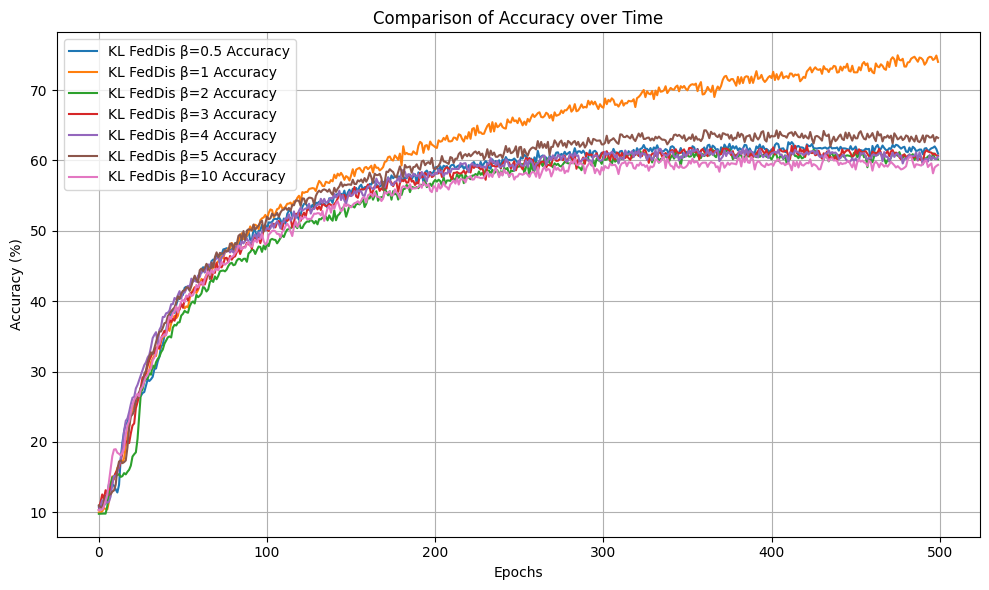

In [4]:
import matplotlib.pyplot as plt

# Data
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []



KL_FedDisb0_5_accuracy = [10.75, 10.89, 10.98, 10.96, 11.33, 12.83, 14.01, 13.91, 14.0, 13.79, 13.27, 12.83, 13.91, 17.66, 19.91, 21.53, 22.53, 22.79, 23.65, 24.38, 24.63, 25.14, 25.7, 26.02, 26.59, 26.55, 26.96, 27.1, 27.97, 28.87, 28.66, 28.91, 29.25, 30.35, 30.45, 31.43, 32.13, 33.6, 33.8, 35.14, 35.85, 37.28, 38.0, 38.03, 38.65, 38.35, 39.46, 40.31, 40.52, 40.72, 40.9, 41.9, 42.05, 41.87, 42.15, 42.52, 42.97, 43.37, 43.11, 43.32, 44.07, 44.0, 44.83, 44.62, 45.11, 44.63, 44.93, 45.69, 45.92, 45.87, 46.48, 46.17, 46.5, 46.65, 47.36, 47.43, 47.53, 47.33, 47.36, 47.35, 47.7, 48.2, 48.33, 47.28, 48.79, 48.67, 49.13, 48.66, 49.25, 49.96, 48.7, 48.76, 50.24, 49.96, 49.0, 50.03, 50.07, 50.85, 50.14, 50.86, 50.23, 51.2, 51.16, 51.27, 51.67, 51.72, 51.6, 51.95, 51.55, 50.89, 51.75, 50.98, 52.4, 52.87, 52.82, 52.09, 52.39, 52.09, 52.13, 51.55, 52.27, 53.4, 53.83, 53.92, 53.46, 53.62, 53.28, 53.69, 53.16, 54.01, 53.9, 54.15, 53.78, 53.9, 53.88, 53.55, 53.3, 54.63, 54.37, 53.97, 55.1, 55.09, 55.24, 55.25, 55.26, 55.04, 55.71, 54.56, 55.43, 55.84, 55.27, 55.98, 55.73, 56.09, 55.57, 56.29, 56.55, 55.85, 56.2, 56.25, 56.06, 56.66, 56.55, 57.18, 56.91, 56.64, 56.23, 56.29, 56.45, 56.97, 55.55, 56.56, 57.6, 56.96, 57.87, 57.47, 57.73, 57.62, 57.71, 57.7, 57.37, 57.23, 57.59, 57.46, 57.88, 58.01, 57.32, 57.79, 58.04, 56.72, 58.3, 58.03, 58.25, 56.87, 58.33, 58.56, 58.13, 58.35, 58.17, 58.34, 59.02, 59.07, 58.47, 59.18, 58.67, 59.25, 59.1, 59.2, 58.43, 59.18, 59.37, 59.35, 58.84, 59.13, 59.29, 59.05, 59.34, 58.81, 59.13, 58.72, 59.33, 58.76, 59.57, 59.77, 59.29, 59.41, 58.91, 59.8, 59.17, 59.56, 59.91, 59.64, 58.93, 58.81, 60.16, 59.59, 59.91, 59.17, 60.03, 58.83, 60.13, 59.84, 60.48, 60.05, 60.09, 60.02, 60.07, 60.27, 59.99, 59.68, 59.71, 60.45, 60.26, 60.8, 60.59, 60.27, 59.56, 60.27, 59.23, 60.44, 59.74, 61.36, 60.4, 60.56, 60.71, 60.5, 60.42, 59.78, 60.64, 60.41, 60.28, 60.59, 61.11, 61.15, 60.49, 60.93, 60.73, 61.23, 60.82, 61.01, 61.21, 60.16, 60.88, 61.74, 60.92, 61.29, 61.3, 61.05, 61.39, 61.05, 60.21, 60.45, 61.45, 60.51, 61.24, 61.37, 61.12, 60.15, 60.69, 61.1, 60.88, 60.86, 61.22, 60.79, 60.9, 60.87, 61.64, 61.08, 61.12, 60.97, 61.3, 61.35, 60.71, 61.1, 60.55, 61.32, 60.91, 61.14, 61.49, 60.8, 61.74, 61.35, 61.63, 61.73, 62.19, 61.67, 61.65, 61.3, 61.76, 61.24, 61.85, 61.58, 62.15, 61.47, 61.39, 61.28, 61.34, 61.61, 61.43, 60.75, 61.9, 62.02, 61.83, 60.93, 60.64, 61.09, 61.76, 61.08, 60.62, 61.25, 60.97, 61.22, 61.04, 62.02, 61.85, 61.03, 61.63, 60.9, 61.38, 61.51, 61.84, 61.17, 62.13, 62.23, 61.48, 62.1, 61.91, 61.51, 61.61, 60.66, 61.87, 61.35, 62.25, 61.85, 61.76, 62.36, 61.54, 62.04, 61.69, 62.01, 61.43, 61.74, 61.51, 61.67, 62.22, 62.15, 61.15, 61.71, 61.22, 61.13, 61.06, 61.99, 61.72, 62.26, 61.57, 62.03, 61.58, 61.64, 61.42, 61.17, 61.58, 61.08, 62.18, 62.44, 62.31, 61.42, 61.68, 61.72, 61.21, 61.14, 62.59, 62.28, 62.61, 62.3, 61.33, 61.98, 62.05, 61.84, 61.85, 61.77, 61.09, 62.28, 62.06, 62.02, 62.33, 61.74, 61.71, 61.69, 61.75, 61.77, 61.68, 61.78, 61.84, 61.66, 61.78, 61.99, 61.7, 61.75, 61.74, 61.84, 61.39, 61.93, 61.66, 61.72, 61.69, 61.61, 61.44, 62.03, 61.52, 61.66, 61.97, 61.31, 60.67, 61.48, 61.38, 61.43, 61.67, 61.58, 61.64, 59.88, 62.06, 61.3, 61.91, 62.2, 61.65, 61.63, 62.12, 61.77, 61.48, 61.45, 61.74, 61.62, 62.21, 61.88, 62.22, 62.14, 61.9, 61.67, 61.85, 61.94, 61.25, 61.17, 61.83, 61.27, 61.94, 61.73, 61.32, 61.41, 61.55, 61.54, 60.86, 61.68, 61.75, 61.3, 61.52, 61.72, 61.81, 61.99, 61.62, 60.96]
KL_FedDisb1_accuracy = [9.99, 9.99, 10.15, 10.62, 10.49, 10.43, 11.52, 13.86, 15.12, 14.71, 15.41, 16.32, 16.72, 17.02, 17.16, 17.67, 19.38, 20.94, 22.3, 23.95, 24.59, 25.06, 26.42, 26.14, 26.77, 27.71, 28.27, 29.19, 29.75, 29.97, 30.19, 31.33, 31.82, 32.26, 32.21, 33.82, 33.19, 34.32, 34.9, 35.05, 35.51, 36.15, 35.78, 36.87, 37.39, 37.94, 37.58, 37.92, 39.13, 39.45, 39.4, 38.98, 39.27, 39.13, 40.42, 41.2, 41.61, 42.0, 41.16, 41.59, 42.33, 43.17, 42.62, 43.21, 43.79, 43.79, 44.65, 43.73, 45.35, 44.82, 45.45, 45.65, 46.03, 46.46, 46.1, 47.01, 47.1, 47.54, 47.51, 48.28, 47.92, 46.64, 47.97, 48.45, 49.08, 49.66, 48.86, 49.09, 49.33, 49.78, 50.63, 50.03, 50.85, 50.86, 50.7, 50.25, 51.5, 51.77, 51.9, 52.26, 51.71, 52.55, 53.04, 52.94, 51.91, 52.51, 53.09, 53.18, 53.74, 53.21, 53.21, 53.43, 53.84, 53.87, 54.01, 53.55, 54.18, 54.14, 54.69, 54.98, 54.17, 55.5, 55.39, 55.52, 55.53, 55.94, 56.0, 56.07, 56.02, 55.66, 56.45, 57.09, 56.83, 56.37, 56.36, 56.97, 56.87, 56.79, 57.21, 57.03, 57.98, 57.47, 58.12, 57.84, 58.23, 57.85, 57.25, 57.77, 57.61, 57.15, 57.88, 58.75, 57.76, 58.69, 58.83, 58.95, 58.59, 58.29, 58.97, 59.07, 58.76, 58.98, 59.25, 58.28, 59.39, 58.95, 58.97, 58.58, 58.77, 59.05, 59.78, 59.88, 60.47, 60.56, 60.1, 59.98, 60.71, 60.42, 60.09, 60.97, 59.28, 62.01, 60.87, 61.07, 60.89, 60.89, 60.79, 61.29, 61.05, 60.87, 62.09, 62.64, 62.44, 61.07, 62.09, 62.18, 61.53, 62.68, 62.25, 62.09, 61.89, 61.77, 62.85, 62.66, 62.74, 63.2, 62.93, 63.52, 62.73, 62.7, 62.77, 63.25, 63.2, 62.92, 63.71, 63.6, 63.04, 62.68, 63.43, 63.1, 64.02, 63.07, 64.47, 64.6, 63.57, 64.95, 63.93, 64.0, 63.76, 63.79, 64.39, 64.9, 65.19, 64.05, 65.44, 64.12, 65.29, 64.72, 64.9, 65.25, 64.75, 64.58, 64.52, 65.83, 65.42, 65.38, 66.1, 65.57, 65.69, 65.3, 66.0, 65.53, 64.98, 65.52, 65.05, 65.9, 65.51, 66.09, 66.55, 66.16, 66.42, 66.71, 66.84, 66.18, 66.11, 66.3, 66.78, 66.59, 66.03, 66.47, 65.66, 66.83, 66.34, 66.44, 66.56, 67.1, 66.73, 67.13, 67.12, 67.43, 67.82, 66.93, 67.21, 68.0, 66.98, 67.1, 67.46, 67.96, 67.48, 67.62, 67.52, 68.48, 67.93, 68.4, 67.96, 68.34, 67.8, 67.3, 67.99, 67.62, 67.48, 68.8, 67.99, 68.6, 68.36, 68.82, 68.58, 67.88, 67.96, 67.65, 68.1, 68.52, 67.79, 68.14, 68.11, 68.47, 68.4, 68.4, 68.69, 67.58, 68.85, 69.02, 69.29, 69.68, 70.01, 68.99, 69.82, 69.49, 69.39, 69.87, 68.71, 69.92, 69.26, 70.37, 69.76, 69.81, 69.96, 70.54, 69.57, 69.93, 70.3, 70.1, 70.04, 70.45, 70.63, 69.82, 70.55, 70.32, 70.58, 70.18, 69.96, 70.49, 70.74, 70.83, 70.74, 70.91, 69.84, 70.65, 71.13, 69.37, 69.43, 69.84, 70.44, 70.03, 69.74, 70.62, 69.01, 69.93, 70.5, 70.09, 70.6, 71.46, 71.91, 72.01, 71.47, 71.29, 71.55, 71.56, 71.12, 70.61, 71.87, 70.89, 71.83, 70.99, 71.8, 71.96, 71.89, 70.98, 71.91, 71.01, 71.83, 72.68, 71.58, 71.69, 72.15, 71.47, 71.14, 71.41, 71.79, 72.0, 71.7, 72.59, 71.42, 72.26, 71.5, 72.01, 72.53, 71.67, 71.88, 71.97, 71.68, 72.35, 72.33, 71.91, 72.2, 72.12, 72.22, 71.24, 71.51, 71.87, 71.72, 72.64, 72.9, 73.22, 72.51, 72.93, 73.23, 72.94, 72.86, 72.98, 72.3, 73.39, 72.97, 72.95, 72.55, 73.06, 73.02, 73.43, 73.35, 72.48, 72.55, 73.33, 72.77, 73.32, 73.17, 73.73, 72.74, 72.63, 73.45, 72.52, 72.51, 72.52, 73.24, 72.8, 73.7, 73.98, 73.53, 73.78, 72.68, 73.07, 72.54, 72.38, 73.78, 73.35, 73.23, 73.66, 73.44, 73.01, 72.87, 74.02, 73.26, 74.34, 74.66, 74.37, 73.41, 74.94, 74.29, 74.21, 74.44, 73.34, 73.33, 73.92, 73.97, 74.45, 74.61, 74.73, 74.37, 74.02, 74.62, 74.53, 74.28, 73.6, 73.92, 74.53, 74.72, 74.69, 74.27, 74.43, 74.9, 74.0]
KL_FedDisb2_accuracy = [9.8, 9.81, 9.83, 9.83, 9.82, 10.87, 12.82, 14.01, 14.97, 15.1, 15.49, 15.29, 15.44, 15.04, 15.15, 15.58, 15.4, 15.77, 16.06, 16.64, 17.93, 18.26, 18.53, 20.45, 23.85, 27.06, 27.49, 28.59, 28.92, 28.98, 29.76, 29.56, 30.89, 30.49, 31.34, 31.8, 32.11, 32.75, 33.13, 33.96, 34.42, 34.86, 35.0, 34.85, 36.25, 36.64, 36.55, 36.98, 37.01, 37.96, 38.21, 38.63, 38.45, 38.36, 39.27, 39.76, 39.97, 39.68, 40.9, 40.57, 40.77, 41.1, 42.08, 41.84, 41.38, 41.67, 42.7, 43.02, 42.74, 43.52, 43.12, 43.6, 44.25, 44.32, 44.36, 44.24, 44.5, 45.01, 45.34, 45.46, 45.11, 45.2, 45.76, 46.02, 45.98, 45.71, 46.02, 46.04, 45.6, 46.78, 46.98, 47.35, 47.26, 46.71, 47.28, 47.77, 47.71, 47.01, 47.91, 47.36, 48.31, 47.83, 48.71, 48.85, 48.74, 48.7, 48.22, 48.58, 48.97, 49.38, 49.12, 49.76, 50.18, 50.24, 50.33, 50.68, 50.66, 50.67, 50.38, 51.24, 50.4, 50.4, 50.88, 51.17, 51.35, 51.29, 51.57, 51.38, 51.05, 51.39, 50.92, 51.67, 51.63, 51.89, 51.68, 52.03, 51.48, 52.19, 51.7, 51.43, 52.9, 51.5, 52.17, 52.38, 52.8, 53.3, 53.16, 52.0, 52.75, 53.58, 53.39, 53.51, 53.31, 53.77, 53.84, 53.75, 54.07, 54.64, 53.38, 53.85, 54.72, 54.59, 55.41, 54.42, 54.99, 55.62, 54.27, 54.67, 54.8, 54.71, 55.92, 55.52, 55.04, 55.63, 54.42, 55.64, 55.18, 55.35, 54.44, 55.27, 55.1, 55.91, 55.97, 56.52, 56.32, 55.5, 56.24, 56.17, 56.07, 56.21, 56.05, 56.54, 56.52, 56.54, 57.2, 56.21, 56.47, 56.71, 56.35, 56.94, 57.23, 56.98, 57.26, 57.07, 56.43, 57.62, 56.65, 57.15, 57.15, 57.09, 57.61, 57.41, 57.0, 58.06, 57.52, 57.94, 57.9, 56.77, 57.96, 57.59, 57.54, 57.33, 57.84, 57.87, 58.07, 57.85, 58.43, 57.96, 58.23, 57.82, 58.71, 58.56, 58.54, 58.13, 58.68, 58.16, 58.4, 58.61, 57.8, 58.46, 57.96, 58.93, 58.75, 58.93, 57.67, 58.61, 58.49, 58.54, 58.98, 59.1, 59.13, 59.48, 59.47, 58.16, 59.06, 59.45, 57.79, 59.55, 58.66, 58.5, 59.76, 59.2, 59.88, 59.56, 59.19, 60.43, 59.61, 60.28, 59.72, 59.29, 59.02, 59.59, 59.35, 59.52, 59.2, 59.14, 59.47, 59.79, 59.7, 59.59, 59.55, 59.62, 59.69, 59.66, 59.19, 59.05, 58.94, 58.61, 59.53, 59.83, 60.38, 60.3, 59.7, 59.37, 60.04, 59.18, 60.28, 60.0, 59.94, 59.51, 60.64, 60.07, 60.14, 60.52, 59.96, 59.45, 60.36, 59.82, 60.06, 59.72, 60.66, 60.2, 60.42, 60.62, 60.71, 60.82, 60.92, 60.4, 60.61, 60.94, 60.89, 60.7, 61.29, 60.78, 61.09, 60.8, 60.14, 60.29, 60.67, 59.71, 60.48, 60.84, 60.65, 59.68, 60.2, 60.23, 60.49, 60.59, 60.34, 59.84, 60.4, 60.75, 60.25, 61.18, 60.84, 60.42, 59.17, 60.66, 60.48, 60.75, 60.72, 60.54, 60.58, 61.15, 60.45, 60.99, 60.67, 60.45, 60.34, 60.93, 60.62, 60.82, 60.78, 60.7, 61.12, 61.54, 60.68, 60.46, 61.19, 61.16, 61.16, 61.12, 61.72, 61.27, 61.53, 61.6, 61.09, 60.17, 60.84, 60.36, 60.3, 61.08, 60.68, 60.2, 60.46, 60.78, 60.54, 61.1, 60.65, 60.53, 60.63, 60.46, 61.11, 60.5, 60.74, 60.78, 60.86, 60.5, 61.12, 60.41, 60.16, 60.6, 61.13, 60.74, 59.92, 60.55, 60.6, 60.2, 60.72, 59.56, 59.91, 60.64, 60.98, 61.22, 60.62, 60.62, 60.32, 60.74, 60.29, 60.41, 60.7, 61.47, 61.29, 61.16, 61.05, 61.52, 61.32, 61.27, 60.86, 60.62, 60.46, 60.12, 60.77, 60.51, 59.87, 60.98, 60.94, 60.54, 60.8, 60.37, 60.4, 60.87, 60.71, 60.52, 60.65, 60.72, 60.66, 60.61, 60.44, 61.08, 60.96, 60.44, 60.8, 60.75, 61.15, 60.45, 60.64, 59.03, 60.54, 59.8, 59.75, 60.58, 61.12, 60.75, 61.08, 61.0, 60.66, 60.26, 59.57, 60.07, 59.91, 60.4, 60.98, 61.1, 60.83, 60.66, 61.18, 60.56, 60.35, 60.85, 60.27, 60.23, 60.85, 60.66, 60.88, 60.07, 60.51, 60.47, 60.7, 60.44, 59.5, 60.32, 60.28, 60.56, 60.68, 60.1, 61.02, 60.3, 60.22, 60.16]
KL_FedDisb3_accuracy = [10.4, 11.48, 12.55, 11.94, 13.15, 12.76, 13.41, 13.23, 14.2, 14.99, 15.63, 16.03, 16.34, 17.2, 18.48, 19.44, 20.13, 19.88, 19.85, 21.22, 22.34, 22.64, 24.81, 25.66, 26.69, 27.81, 29.2, 28.77, 29.97, 30.82, 31.62, 32.13, 32.71, 32.56, 33.38, 33.43, 33.31, 34.73, 35.28, 35.81, 35.39, 36.32, 37.37, 37.03, 37.5, 37.23, 38.02, 38.97, 38.8, 39.65, 39.07, 40.18, 40.54, 40.12, 41.04, 41.2, 41.34, 41.93, 41.61, 41.8, 42.66, 42.39, 43.08, 42.38, 43.11, 44.54, 43.47, 43.17, 44.17, 44.03, 45.42, 44.66, 44.9, 44.81, 45.32, 46.12, 46.17, 45.58, 46.43, 45.9, 46.26, 46.37, 46.98, 47.5, 46.71, 47.39, 47.7, 47.7, 48.28, 48.06, 48.18, 47.44, 49.12, 49.0, 48.69, 49.15, 48.25, 49.03, 50.21, 50.4, 50.12, 49.97, 50.73, 50.75, 51.01, 50.49, 51.2, 51.41, 50.95, 50.23, 51.33, 51.65, 51.4, 51.68, 51.83, 50.48, 51.21, 52.39, 52.44, 52.62, 51.4, 52.17, 52.58, 52.0, 53.17, 52.97, 52.83, 53.05, 53.27, 53.51, 53.05, 53.46, 52.95, 53.9, 53.67, 53.52, 53.6, 53.82, 53.68, 53.5, 53.8, 54.08, 54.58, 55.14, 55.05, 55.06, 55.1, 54.33, 55.02, 55.01, 54.97, 55.46, 56.23, 54.88, 54.69, 55.67, 55.9, 55.89, 55.9, 56.15, 56.57, 56.26, 55.0, 55.68, 56.34, 56.16, 56.36, 55.67, 56.05, 55.81, 56.98, 55.98, 57.36, 57.15, 56.83, 56.35, 56.92, 56.82, 55.54, 56.75, 57.26, 57.04, 57.28, 56.82, 56.89, 57.88, 56.99, 57.1, 56.51, 56.89, 56.73, 58.25, 57.59, 57.71, 58.23, 57.99, 57.62, 58.3, 57.64, 57.77, 58.21, 58.21, 58.16, 58.64, 57.65, 58.48, 58.88, 59.04, 58.84, 57.76, 57.33, 58.23, 58.24, 58.34, 58.18, 58.13, 58.27, 58.54, 58.11, 58.47, 58.66, 58.28, 59.33, 58.93, 59.19, 59.06, 59.03, 58.71, 59.02, 58.07, 57.25, 59.53, 59.38, 59.75, 59.22, 59.23, 59.07, 59.19, 59.42, 58.89, 59.51, 59.85, 59.9, 59.8, 59.68, 58.85, 59.42, 59.86, 58.59, 59.35, 59.92, 59.12, 58.73, 59.62, 60.36, 60.05, 60.34, 59.87, 60.12, 59.05, 59.6, 58.42, 59.47, 59.77, 59.82, 59.79, 59.01, 59.41, 59.32, 59.24, 60.43, 60.38, 59.94, 59.96, 60.17, 60.32, 60.04, 60.69, 59.8, 60.18, 60.58, 60.48, 59.8, 60.78, 58.82, 60.11, 59.88, 59.95, 60.42, 59.51, 61.07, 60.8, 60.79, 60.83, 60.46, 60.65, 61.02, 60.24, 60.31, 60.95, 61.19, 60.38, 61.31, 60.57, 59.99, 61.13, 60.36, 60.11, 61.12, 60.94, 60.43, 61.06, 60.54, 60.33, 60.65, 60.32, 60.1, 60.67, 60.61, 60.81, 61.18, 60.64, 60.95, 60.62, 61.47, 61.44, 60.72, 59.65, 60.63, 60.93, 61.01, 60.68, 60.66, 61.13, 61.1, 60.52, 60.77, 61.06, 60.76, 60.27, 61.37, 61.49, 61.17, 61.59, 61.13, 61.04, 61.07, 61.39, 61.57, 60.88, 60.77, 61.76, 61.78, 61.61, 61.21, 61.16, 61.54, 60.13, 61.39, 61.62, 61.2, 60.88, 60.61, 61.45, 61.68, 60.91, 61.34, 61.34, 60.88, 60.85, 60.89, 61.72, 61.54, 61.71, 61.57, 61.31, 60.75, 61.32, 60.31, 60.72, 60.96, 61.26, 60.88, 61.46, 61.18, 60.73, 61.24, 60.55, 60.97, 60.52, 60.73, 61.0, 61.34, 61.65, 61.62, 61.25, 60.94, 61.51, 60.6, 61.17, 61.17, 61.85, 60.86, 61.14, 61.14, 61.55, 61.33, 61.24, 61.36, 61.4, 60.64, 60.19, 62.07, 61.06, 62.09, 61.06, 60.77, 61.68, 61.24, 61.5, 60.5, 62.12, 61.0, 61.24, 61.04, 61.24, 60.73, 60.83, 61.36, 60.75, 60.25, 61.01, 60.78, 61.27, 60.18, 60.46, 60.4, 60.18, 60.57, 59.99, 60.75, 60.42, 61.55, 61.0, 61.29, 61.45, 61.42, 61.0, 60.53, 60.69, 61.48, 60.93, 61.58, 61.31, 61.09, 61.22, 61.31, 60.92, 60.55, 60.27, 61.26, 61.05, 61.01, 61.1, 61.63, 61.11, 60.23, 60.86, 61.03, 61.3, 60.62, 61.29, 61.47, 60.82, 61.12, 60.9, 60.46, 60.14, 60.73, 60.85, 60.42, 60.67, 60.64, 60.6, 60.38, 60.52, 60.63, 60.0, 60.26, 60.05, 59.75, 61.08, 61.44, 61.28, 61.17, 61.11, 60.84, 60.98, 60.7, 60.66]
KL_FedDisb4_accuracy =  [10.38, 10.94, 11.72, 11.68, 11.6, 11.38, 11.52, 12.27, 13.94, 15.19, 15.12, 15.61, 16.64, 17.53, 19.21, 21.53, 23.01, 23.34, 24.25, 25.36, 26.3, 26.39, 27.61, 28.12, 28.83, 29.58, 30.28, 30.92, 31.31, 32.0, 32.39, 33.49, 34.76, 35.22, 35.6, 33.84, 35.93, 36.39, 37.76, 37.77, 38.29, 38.36, 38.67, 39.58, 39.57, 40.46, 40.25, 40.88, 41.43, 40.36, 41.45, 41.22, 41.71, 42.18, 41.95, 43.21, 42.77, 42.95, 42.75, 43.66, 43.44, 44.21, 44.34, 44.06, 44.8, 45.22, 45.04, 45.5, 44.99, 45.8, 46.15, 46.18, 45.19, 46.26, 46.43, 47.02, 47.07, 47.26, 46.92, 47.22, 46.9, 47.72, 47.77, 47.99, 47.48, 48.58, 48.21, 48.54, 48.91, 48.47, 48.06, 48.63, 49.2, 49.5, 48.86, 49.76, 48.91, 49.95, 50.12, 50.05, 50.41, 50.23, 50.32, 51.08, 50.42, 50.99, 51.32, 50.97, 50.33, 51.19, 51.26, 51.78, 51.75, 52.36, 51.42, 51.81, 52.76, 51.78, 52.2, 52.87, 53.29, 52.87, 53.04, 53.18, 53.23, 53.85, 52.45, 53.09, 53.1, 53.54, 53.7, 53.76, 54.55, 53.95, 54.54, 53.97, 54.12, 54.48, 54.68, 54.6, 55.29, 54.75, 55.0, 55.7, 54.37, 55.07, 54.31, 53.84, 54.76, 55.53, 54.93, 55.09, 55.64, 55.28, 55.76, 55.59, 55.62, 55.04, 54.95, 55.78, 56.27, 56.36, 56.14, 55.94, 56.01, 57.43, 56.87, 56.61, 57.07, 56.76, 56.21, 56.95, 57.53, 57.13, 56.51, 56.51, 56.96, 57.04, 57.59, 56.91, 58.49, 58.64, 58.37, 57.6, 58.06, 57.85, 57.64, 58.14, 57.86, 57.76, 58.04, 57.47, 58.35, 58.07, 57.62, 57.01, 58.23, 58.1, 57.88, 57.91, 58.2, 58.08, 58.71, 58.28, 58.42, 57.75, 58.23, 58.11, 58.6, 58.27, 58.83, 58.78, 58.83, 58.77, 58.79, 59.62, 59.44, 59.57, 59.61, 58.96, 58.33, 59.36, 59.59, 59.25, 59.34, 59.11, 59.38, 59.17, 59.02, 59.14, 58.87, 59.53, 59.54, 60.34, 59.75, 59.86, 59.35, 59.92, 59.09, 59.07, 59.31, 59.15, 60.16, 59.93, 59.13, 59.23, 59.43, 58.55, 59.34, 59.54, 60.01, 59.32, 59.24, 59.25, 60.02, 59.07, 60.05, 59.95, 59.56, 58.65, 59.49, 59.63, 59.94, 60.4, 60.58, 60.69, 59.35, 60.01, 60.45, 60.03, 60.72, 60.33, 60.19, 60.75, 60.68, 60.13, 60.72, 60.43, 59.81, 59.95, 60.85, 60.84, 60.4, 61.05, 60.64, 60.71, 59.59, 59.95, 60.26, 60.29, 60.35, 59.95, 60.04, 59.27, 60.65, 60.69, 60.7, 60.2, 59.93, 60.01, 60.2, 61.24, 60.77, 61.03, 60.95, 61.22, 60.94, 60.43, 60.74, 59.56, 60.43, 60.32, 60.14, 61.42, 60.9, 60.88, 61.04, 61.31, 60.47, 61.22, 60.92, 61.44, 60.41, 61.08, 60.89, 60.89, 60.06, 60.81, 60.49, 60.05, 60.51, 61.49, 60.38, 61.64, 61.64, 61.07, 60.82, 60.75, 60.64, 60.95, 61.12, 61.27, 60.61, 60.42, 60.82, 59.99, 60.57, 60.3, 61.07, 60.54, 60.96, 61.37, 60.8, 61.54, 61.26, 61.54, 61.38, 61.0, 61.08, 60.62, 60.73, 60.89, 61.57, 60.83, 61.18, 60.77, 61.02, 61.36, 61.39, 59.89, 60.25, 60.56, 61.43, 60.62, 61.22, 60.97, 61.21, 60.95, 60.34, 60.41, 60.8, 61.29, 60.89, 61.71, 60.79, 61.62, 60.79, 61.4, 61.25, 61.04, 60.59, 60.63, 60.42, 61.55, 60.88, 60.46, 60.73, 60.95, 60.34, 60.7, 61.02, 61.09, 61.23, 61.02, 61.5, 60.77, 60.84, 60.28, 60.62, 60.68, 59.64, 61.15, 61.02, 60.84, 61.5, 61.22, 61.13, 61.01, 60.99, 60.74, 60.96, 61.2, 60.83, 61.19, 61.31, 61.34, 60.91, 61.43, 60.69, 60.44, 60.76, 60.33, 61.01, 60.98, 61.47, 60.92, 61.18, 61.06, 61.12, 60.86, 60.19, 60.35, 60.7, 60.82, 60.22, 59.95, 59.76, 59.91, 60.32, 59.88, 60.29, 59.86, 60.12, 61.04, 60.94, 61.07, 60.45, 60.12, 60.4, 60.3, 60.81, 60.84, 60.63, 60.83, 61.01, 61.11, 59.88, 61.19, 60.51, 60.53, 59.82, 60.44, 61.11, 60.49, 60.87, 61.01, 60.51, 60.7, 59.57, 60.21, 60.28, 60.49, 60.83, 60.64, 60.62, 60.64, 61.14, 60.02, 61.16, 60.43, 59.42, 60.14, 60.24, 59.83, 60.75, 60.1, 60.51, 60.2, 60.17, 60.54]
KL_FedDisb5_accuracy =  [11.01, 10.74, 10.61, 11.7, 12.33, 12.45, 12.48, 12.57, 12.95, 13.12, 13.94, 16.14, 17.23, 17.38, 16.99, 17.14, 17.38, 19.22, 22.01, 23.64, 23.91, 24.43, 26.28, 26.21, 27.07, 27.76, 28.23, 29.66, 30.13, 31.39, 32.15, 32.73, 32.46, 33.32, 34.13, 35.07, 35.68, 35.71, 36.21, 36.88, 36.96, 37.89, 38.23, 38.58, 38.86, 39.11, 39.84, 40.7, 40.3, 41.09, 41.48, 41.56, 41.96, 41.95, 41.47, 42.15, 42.99, 43.63, 43.04, 42.67, 44.4, 44.65, 44.29, 44.69, 45.31, 44.85, 43.16, 45.49, 44.78, 46.25, 46.94, 46.25, 46.87, 46.76, 46.78, 47.25, 47.07, 47.16, 48.18, 48.18, 47.35, 48.24, 48.09, 49.28, 49.5, 48.7, 49.97, 48.72, 50.02, 50.22, 50.17, 50.11, 50.89, 50.19, 50.47, 50.76, 51.2, 51.44, 49.89, 51.05, 52.0, 51.65, 51.77, 52.44, 52.16, 52.19, 52.55, 51.98, 52.6, 52.95, 53.01, 53.29, 52.97, 53.25, 52.85, 53.69, 53.63, 54.3, 54.3, 54.25, 53.54, 54.62, 54.57, 53.84, 54.51, 54.71, 54.69, 54.59, 53.71, 54.94, 55.44, 55.71, 55.49, 55.78, 55.89, 55.78, 55.55, 55.89, 55.42, 55.12, 56.11, 55.53, 55.98, 56.31, 56.9, 56.27, 56.57, 56.48, 56.58, 56.59, 56.53, 57.26, 56.65, 56.65, 57.17, 57.02, 57.29, 56.86, 57.49, 56.98, 57.44, 58.27, 57.61, 56.79, 58.12, 57.92, 57.92, 58.1, 57.5, 55.95, 56.91, 58.41, 58.35, 58.76, 58.52, 58.35, 57.73, 57.57, 58.37, 59.15, 58.45, 57.59, 59.36, 58.99, 59.05, 59.15, 58.26, 59.05, 59.1, 59.45, 58.91, 58.69, 59.85, 59.98, 59.32, 59.62, 59.76, 59.5, 60.35, 58.87, 58.75, 59.03, 59.23, 59.67, 60.62, 59.87, 59.8, 59.66, 59.5, 60.48, 60.36, 59.64, 60.25, 60.22, 60.91, 61.16, 60.24, 60.72, 60.9, 60.59, 60.95, 60.59, 60.83, 61.13, 61.28, 60.95, 61.22, 60.74, 60.97, 60.14, 60.59, 61.6, 60.42, 61.39, 60.76, 61.12, 60.53, 60.5, 60.73, 60.81, 60.33, 61.12, 62.05, 61.19, 61.72, 61.02, 61.13, 61.42, 62.01, 60.46, 61.85, 61.93, 60.5, 61.61, 61.05, 60.66, 61.38, 61.68, 61.85, 61.76, 61.56, 62.75, 61.79, 62.63, 61.8, 62.33, 61.77, 62.64, 60.78, 61.92, 61.93, 62.85, 62.47, 61.96, 62.57, 62.82, 62.08, 62.47, 61.84, 62.77, 62.57, 62.25, 62.58, 62.76, 62.18, 62.64, 61.94, 62.21, 62.56, 61.83, 62.22, 63.2, 62.6, 62.28, 63.06, 62.96, 62.79, 62.82, 62.84, 62.28, 62.27, 62.51, 63.51, 62.44, 62.83, 62.95, 63.16, 62.84, 62.53, 62.35, 63.7, 63.67, 63.33, 63.31, 63.51, 63.31, 63.12, 63.64, 63.03, 62.75, 63.3, 63.82, 63.37, 63.88, 63.05, 63.06, 63.21, 63.25, 62.84, 63.12, 62.84, 63.36, 63.12, 63.39, 63.14, 62.94, 62.95, 62.85, 62.28, 62.63, 63.07, 62.93, 63.61, 63.68, 63.47, 63.63, 63.42, 63.12, 63.57, 62.77, 62.99, 63.28, 63.05, 63.7, 62.79, 63.41, 62.96, 63.01, 62.75, 63.16, 64.28, 64.27, 63.89, 63.16, 64.07, 63.75, 63.84, 63.48, 63.31, 63.67, 63.01, 63.87, 63.79, 63.63, 63.68, 63.09, 63.6, 62.85, 63.23, 63.12, 63.97, 63.32, 63.79, 63.58, 62.62, 63.4, 63.47, 63.6, 62.88, 62.76, 63.85, 63.28, 62.97, 63.33, 64.02, 64.15, 62.94, 62.68, 63.95, 63.24, 63.5, 63.41, 63.45, 64.27, 63.17, 64.07, 63.61, 63.48, 63.45, 63.23, 63.79, 63.92, 64.0, 63.49, 64.05, 63.64, 63.32, 63.28, 63.81, 63.17, 63.55, 63.26, 63.09, 64.04, 63.1, 62.4, 63.39, 63.48, 63.35, 63.11, 62.81, 64.19, 63.58, 63.46, 63.69, 62.03, 62.83, 63.37, 62.74, 62.98, 63.41, 63.68, 63.05, 62.9, 63.97, 63.14, 63.93, 63.36, 62.81, 63.58, 63.14, 63.14, 63.89, 64.15, 63.52, 63.07, 62.98, 63.8, 63.25, 63.48, 63.89, 63.2, 62.74, 64.1, 63.54, 63.72, 62.7, 63.33, 63.25, 63.55, 63.2, 63.52, 62.41, 63.85, 63.47, 62.99, 63.14, 63.4, 62.89, 63.09, 63.55, 63.42, 62.69, 63.38, 63.03, 62.69, 63.52, 62.74, 62.6, 62.94, 63.56, 62.58, 63.53, 63.5, 63.25, 63.27, 63.6, 62.7, 63.35, 63.2]
KL_FedDisb10_accuracy = [10.34, 10.33, 10.42, 10.84, 11.61, 12.52, 14.35, 16.07, 18.0, 18.93, 18.98, 18.47, 18.32, 18.09, 18.46, 19.09, 21.11, 22.38, 22.99, 24.18, 25.28, 26.0, 26.4, 26.88, 26.49, 27.5, 27.85, 28.61, 29.25, 29.54, 30.21, 30.45, 31.59, 31.99, 32.64, 33.7, 33.91, 34.82, 35.0, 35.3, 35.15, 36.95, 37.84, 37.55, 38.31, 38.57, 39.26, 38.39, 39.26, 39.97, 40.16, 39.91, 40.81, 40.64, 41.1, 40.73, 40.86, 41.45, 42.32, 41.97, 42.49, 42.74, 42.21, 43.14, 43.67, 44.23, 43.72, 44.45, 44.0, 44.43, 44.63, 44.4, 45.0, 45.57, 45.28, 45.19, 45.41, 45.51, 46.1, 46.31, 46.45, 46.84, 47.14, 47.89, 47.81, 47.38, 47.66, 47.6, 48.11, 48.38, 47.83, 47.73, 48.45, 48.7, 48.36, 48.84, 48.85, 49.52, 48.54, 48.05, 48.3, 49.43, 49.71, 49.98, 50.04, 49.92, 49.56, 49.57, 49.07, 49.85, 50.11, 50.68, 51.02, 50.64, 49.87, 49.26, 50.56, 51.33, 50.55, 50.97, 51.96, 51.67, 51.93, 52.0, 51.62, 51.72, 51.62, 51.99, 52.44, 52.41, 52.51, 52.49, 52.21, 52.81, 51.41, 52.37, 53.19, 53.55, 52.58, 53.6, 53.13, 53.87, 54.21, 53.47, 52.78, 53.0, 53.8, 53.51, 53.75, 53.46, 53.34, 53.7, 53.92, 54.01, 54.21, 53.88, 54.32, 54.73, 54.71, 54.04, 55.04, 55.2, 55.24, 54.84, 55.45, 54.92, 54.83, 54.74, 54.23, 54.57, 55.54, 55.28, 55.48, 55.6, 54.98, 55.1, 55.89, 55.47, 55.16, 54.62, 56.11, 56.34, 56.24, 56.11, 56.03, 56.62, 55.95, 56.03, 56.02, 56.08, 56.26, 56.52, 56.11, 56.93, 56.57, 56.38, 56.65, 55.71, 55.5, 56.37, 56.17, 55.62, 56.67, 56.0, 56.27, 56.96, 56.33, 56.19, 55.86, 56.59, 56.85, 57.15, 56.71, 57.5, 56.57, 57.35, 57.3, 57.28, 56.88, 57.54, 57.58, 57.8, 57.27, 57.3, 57.76, 57.62, 57.59, 57.49, 57.48, 57.58, 57.97, 58.38, 57.67, 58.06, 57.65, 58.42, 58.9, 58.39, 57.62, 58.34, 57.85, 58.72, 58.18, 58.32, 57.71, 58.06, 58.09, 57.28, 57.69, 57.71, 58.11, 58.06, 57.96, 58.14, 58.28, 57.99, 57.66, 58.2, 58.37, 58.27, 57.68, 59.03, 57.5, 58.07, 58.73, 59.13, 58.53, 58.78, 58.67, 57.72, 58.3, 59.21, 58.67, 58.94, 58.57, 58.55, 59.17, 58.19, 58.54, 58.4, 59.4, 59.86, 59.56, 60.19, 59.42, 59.34, 59.64, 59.51, 59.37, 58.16, 59.02, 59.39, 59.77, 59.51, 59.14, 58.19, 58.78, 58.54, 57.99, 59.05, 58.55, 59.2, 58.97, 58.89, 59.59, 59.31, 59.36, 59.37, 58.97, 58.06, 59.18, 59.6, 59.64, 59.82, 59.18, 59.73, 59.69, 59.63, 58.91, 58.82, 59.4, 59.25, 59.73, 59.31, 59.38, 59.08, 59.3, 58.53, 59.17, 59.03, 59.22, 60.16, 60.01, 59.72, 59.83, 60.3, 60.59, 58.92, 60.28, 59.72, 59.24, 59.15, 58.73, 59.71, 59.14, 58.95, 59.33, 58.97, 58.93, 59.07, 59.32, 59.91, 59.54, 60.25, 59.69, 59.83, 59.76, 59.09, 59.51, 59.68, 59.69, 59.68, 59.08, 59.56, 59.78, 59.66, 59.63, 59.03, 59.16, 58.39, 59.65, 59.68, 58.96, 59.29, 59.69, 59.37, 59.6, 59.56, 59.52, 59.44, 60.3, 60.29, 59.14, 60.58, 59.74, 60.57, 59.71, 59.65, 60.51, 60.13, 58.72, 59.61, 59.89, 59.76, 59.39, 59.23, 59.06, 59.58, 59.33, 59.43, 59.52, 59.24, 59.76, 59.93, 60.21, 59.72, 59.52, 59.64, 59.32, 59.48, 59.64, 59.34, 58.59, 59.85, 59.18, 59.8, 58.99, 59.82, 59.35, 59.27, 59.49, 59.65, 59.59, 60.16, 59.17, 59.47, 59.34, 59.14, 58.74, 58.75, 59.57, 60.19, 60.74, 60.44, 59.91, 60.23, 60.32, 59.99, 60.02, 59.93, 59.34, 59.67, 59.48, 59.57, 59.59, 59.84, 59.93, 59.42, 59.02, 59.77, 58.71, 59.75, 60.12, 59.82, 59.98, 59.72, 59.62, 59.21, 59.97, 59.75, 58.55, 59.56, 59.82, 59.56, 59.03, 59.62, 59.4, 59.11, 59.35, 59.11, 59.45, 59.79, 59.56, 59.31, 58.99, 59.19, 58.96, 58.72, 58.8, 58.96, 59.17, 60.15, 60.49, 60.54, 59.77, 59.0, 59.46, 59.41, 59.34, 59.27, 59.55, 59.86, 59.96, 59.06, 59.36, 59.58, 58.17, 59.0, 59.21, 59.37]



# Plotting
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(KL_FedDisb0_5_accuracy, label='KL FedDis β=0.5 Accuracy')

plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
plt.plot(KL_FedDisb2_accuracy, label='KL FedDis β=2 Accuracy')
plt.plot(KL_FedDisb3_accuracy, label='KL FedDis β=3 Accuracy')
plt.plot(KL_FedDisb4_accuracy, label='KL FedDis β=4 Accuracy')
plt.plot(KL_FedDisb5_accuracy, label='KL FedDis β=5 Accuracy')
plt.plot(KL_FedDisb10_accuracy, label='KL FedDis β=10 Accuracy')


# Adding titles and labels
plt.title('Comparison of Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# Adding legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


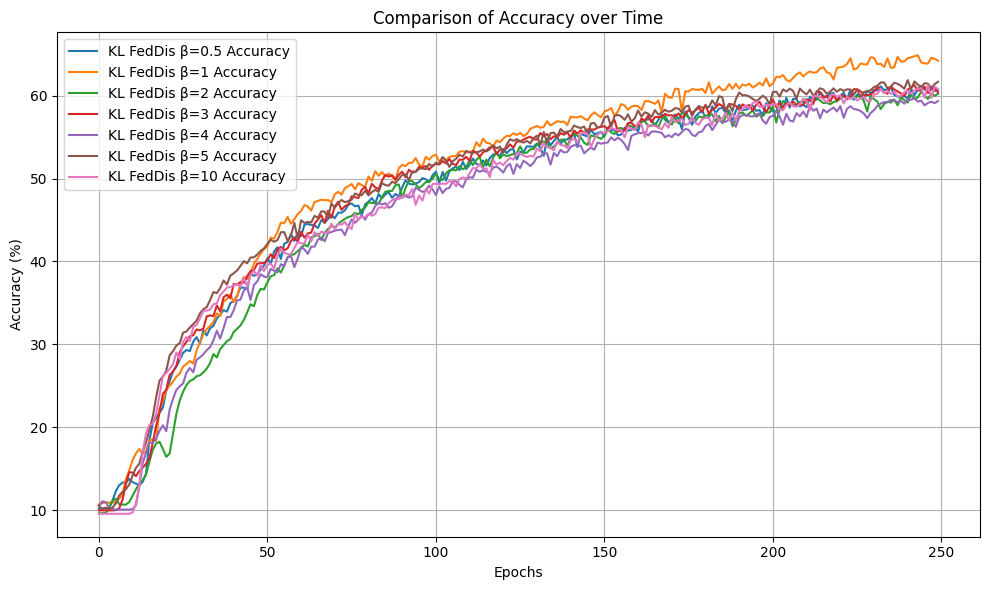

In [5]:
import matplotlib.pyplot as plt

# Data
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []

KL_FedDisb0_5_accuracy = [10.22, 10.22, 10.22, 10.25, 11.11, 12.28, 13.01, 13.34, 13.38, 13.78, 13.4, 13.21, 13.03, 13.43, 14.44, 18.44, 20.53, 21.15, 21.79, 22.38, 24.46, 25.56, 26.78, 27.32, 28.17, 28.99, 29.32, 29.2, 30.33, 30.88, 30.08, 31.7, 31.08, 31.93, 32.25, 33.14, 33.57, 34.14, 33.95, 34.96, 35.24, 35.84, 36.86, 36.83, 36.67, 38.49, 38.27, 38.49, 39.02, 39.51, 40.37, 39.73, 41.22, 41.71, 40.29, 42.13, 42.35, 43.3, 42.47, 43.45, 43.04, 44.43, 44.52, 44.4, 44.35, 44.03, 44.99, 44.66, 45.12, 45.62, 45.21, 45.89, 45.87, 46.16, 46.85, 46.98, 46.65, 46.74, 45.6, 46.88, 47.19, 47.65, 47.0, 48.12, 47.63, 48.08, 48.34, 47.68, 48.14, 47.84, 48.93, 49.78, 49.39, 49.29, 49.36, 49.58, 50.04, 49.93, 49.55, 50.39, 50.83, 49.44, 50.79, 49.75, 50.87, 51.24, 51.41, 51.02, 52.0, 51.15, 51.65, 52.41, 51.78, 51.59, 52.17, 51.57, 52.49, 52.88, 53.01, 52.71, 53.57, 53.05, 53.49, 53.53, 52.3, 53.22, 53.16, 53.88, 53.86, 53.82, 54.23, 53.68, 52.74, 54.84, 54.0, 54.54, 54.99, 54.22, 54.65, 54.72, 55.08, 55.43, 53.79, 55.41, 55.21, 55.08, 55.86, 55.35, 55.44, 55.64, 55.06, 56.13, 55.79, 55.87, 55.21, 55.3, 56.14, 55.77, 55.86, 56.25, 55.67, 57.13, 57.01, 57.16, 57.05, 56.34, 57.09, 57.7, 57.09, 56.75, 57.08, 57.72, 57.22, 55.95, 58.09, 57.33, 56.47, 57.46, 57.88, 58.17, 57.38, 57.32, 58.7, 57.88, 58.42, 58.52, 57.91, 58.22, 56.91, 58.15, 58.89, 58.28, 58.3, 58.46, 58.81, 58.16, 58.25, 57.62, 59.07, 58.56, 58.06, 58.0, 59.42, 58.35, 59.74, 58.55, 59.6, 59.58, 58.7, 58.89, 58.59, 59.86, 59.39, 59.52, 60.45, 59.93, 59.79, 60.22, 60.33, 59.3, 59.99, 60.34, 59.59, 60.69, 59.48, 60.11, 59.96, 59.67, 60.59, 60.27, 60.67, 60.62, 61.12, 60.66, 60.76, 60.99, 60.08, 59.9, 59.75, 59.96, 59.63, 60.76, 60.05, 60.79, 61.17, 60.71, 60.75, 61.05, 60.54, 60.64]
KL_FedDisb1_accuracy = [10.7, 10.85, 10.96, 10.9, 11.05, 10.86, 11.4, 11.9, 13.73, 14.81, 16.03, 16.87, 17.39, 16.82, 17.13, 18.42, 18.54, 18.37, 22.25, 23.2, 24.52, 25.03, 25.52, 26.11, 26.5, 27.34, 27.64, 28.01, 27.67, 29.3, 30.23, 31.23, 31.84, 32.24, 32.7, 33.74, 33.41, 35.18, 35.46, 36.03, 35.09, 35.76, 37.31, 38.13, 37.85, 38.65, 39.74, 40.32, 40.95, 41.48, 41.81, 42.87, 42.76, 43.58, 44.7, 44.61, 45.38, 44.55, 45.1, 45.72, 46.09, 46.8, 46.64, 46.13, 47.18, 47.3, 47.45, 47.38, 47.41, 47.13, 48.11, 48.39, 48.06, 48.84, 49.07, 49.34, 48.7, 49.44, 49.2, 48.99, 50.24, 49.72, 50.88, 50.33, 50.78, 50.25, 50.61, 50.24, 49.81, 51.26, 51.65, 51.49, 51.89, 51.91, 52.47, 51.69, 51.46, 52.61, 52.26, 52.72, 52.87, 52.05, 52.48, 52.24, 52.6, 52.7, 52.71, 53.23, 53.3, 53.14, 53.24, 53.28, 54.37, 53.88, 54.82, 54.3, 54.24, 53.86, 54.58, 54.36, 54.82, 55.15, 55.11, 55.46, 55.25, 55.5, 55.11, 55.37, 55.98, 56.17, 56.33, 56.13, 56.22, 56.91, 56.4, 56.64, 56.92, 56.82, 56.87, 56.45, 57.46, 57.38, 57.38, 57.51, 57.24, 57.01, 57.6, 57.98, 57.64, 57.38, 58.08, 58.23, 58.5, 57.58, 58.09, 58.97, 58.8, 58.29, 58.66, 58.76, 58.73, 58.25, 59.31, 59.34, 59.18, 59.0, 59.41, 57.99, 60.22, 59.81, 59.72, 60.82, 60.79, 58.07, 60.51, 60.49, 60.79, 60.72, 60.67, 60.83, 60.32, 61.6, 60.24, 60.69, 61.12, 60.64, 60.74, 61.39, 60.81, 61.42, 60.84, 61.33, 61.21, 61.44, 60.98, 61.21, 61.56, 61.22, 62.08, 61.13, 61.43, 62.28, 62.21, 62.47, 61.88, 61.7, 62.14, 62.55, 62.8, 62.31, 62.66, 62.92, 62.75, 62.81, 63.25, 63.41, 62.8, 62.66, 61.94, 63.34, 63.42, 63.5, 63.81, 64.5, 63.12, 63.32, 63.88, 63.77, 63.75, 64.63, 64.54, 63.78, 63.84, 63.46, 64.47, 63.33, 63.42, 64.67, 64.09, 64.12, 64.51, 64.6, 64.74, 64.86, 64.0, 63.87, 63.87, 64.56, 64.42, 64.21]
KL_FedDisb2_accuracy = [9.63, 9.66, 9.69, 10.19, 11.12, 11.4, 10.76, 10.69, 10.68, 11.0, 11.74, 12.52, 13.22, 13.65, 14.3, 15.85, 17.31, 18.05, 18.26, 17.39, 16.45, 16.84, 19.25, 21.64, 23.23, 24.31, 25.09, 25.59, 25.78, 26.16, 26.27, 26.63, 27.07, 27.75, 28.84, 28.43, 29.44, 29.9, 30.4, 30.64, 31.51, 31.88, 32.28, 32.94, 33.84, 34.84, 34.6, 35.94, 36.7, 36.62, 37.47, 38.22, 38.35, 39.17, 38.67, 39.55, 40.48, 40.77, 40.87, 41.27, 41.56, 42.02, 41.81, 42.9, 43.02, 43.35, 42.59, 43.45, 43.91, 44.28, 44.05, 44.53, 44.85, 45.12, 45.36, 45.48, 45.85, 45.68, 46.2, 46.48, 47.14, 47.04, 47.02, 46.96, 47.76, 48.41, 48.49, 48.51, 49.2, 49.28, 47.68, 48.86, 49.72, 49.69, 49.3, 48.83, 49.15, 49.57, 49.6, 49.96, 50.57, 49.92, 49.81, 50.64, 50.98, 51.04, 50.98, 51.5, 51.11, 51.37, 52.22, 51.62, 52.26, 52.6, 51.38, 52.28, 51.47, 52.54, 53.17, 52.44, 52.89, 52.7, 52.82, 52.95, 53.06, 53.88, 53.08, 53.11, 53.52, 53.55, 54.1, 54.32, 54.47, 54.26, 53.64, 53.85, 54.23, 54.66, 54.71, 53.92, 54.87, 55.42, 55.15, 54.94, 54.31, 54.05, 55.19, 55.08, 54.98, 54.77, 55.19, 55.97, 55.56, 55.35, 56.03, 56.1, 55.79, 56.44, 56.29, 56.14, 56.26, 56.83, 56.91, 56.31, 56.39, 56.64, 56.13, 57.17, 57.58, 56.82, 56.5, 57.32, 56.65, 57.97, 57.74, 57.36, 57.16, 56.92, 57.49, 57.36, 57.54, 57.71, 57.74, 56.89, 57.55, 56.67, 57.44, 57.99, 56.3, 57.02, 57.85, 57.98, 57.55, 57.84, 58.23, 57.45, 57.7, 57.53, 58.01, 57.95, 58.72, 56.74, 58.37, 59.35, 59.06, 59.14, 58.88, 58.79, 59.26, 59.19, 59.6, 58.29, 59.57, 59.7, 59.41, 59.1, 59.12, 58.96, 59.23, 59.34, 59.63, 59.91, 59.62, 59.9, 59.65, 59.85, 60.03, 59.32, 58.07, 60.05, 59.57, 59.29, 58.36, 58.99, 59.26, 59.16, 59.53, 58.83, 59.74, 59.46, 59.15, 60.1, 59.63, 59.76, 60.48, 60.01, 59.58, 60.22, 59.97, 60.22]
KL_FedDisb3_accuracy = [9.99, 9.99, 9.99, 9.99, 9.99, 10.02, 10.21, 11.25, 13.15, 14.6, 14.55, 14.12, 14.74, 15.15, 15.6, 16.27, 18.16, 20.21, 21.77, 24.04, 24.52, 26.33, 26.71, 27.41, 29.06, 29.78, 30.31, 30.99, 31.1, 31.8, 31.71, 31.9, 33.37, 33.5, 33.42, 34.69, 33.99, 35.68, 36.0, 35.57, 37.27, 37.22, 37.51, 37.42, 38.24, 38.82, 38.96, 39.74, 39.79, 39.79, 40.1, 40.87, 40.4, 41.43, 41.76, 41.35, 41.58, 42.46, 42.9, 42.36, 43.57, 42.88, 43.39, 43.48, 44.55, 45.05, 45.58, 44.65, 46.11, 45.26, 46.63, 47.2, 46.23, 46.66, 46.86, 47.86, 47.75, 47.64, 48.65, 48.98, 48.2, 49.36, 48.93, 48.73, 49.74, 50.44, 50.23, 50.4, 49.89, 50.46, 50.82, 50.16, 51.06, 50.7, 50.81, 51.4, 51.29, 51.52, 51.05, 51.57, 51.76, 51.69, 52.1, 51.82, 52.37, 51.77, 51.61, 52.28, 52.26, 52.61, 52.14, 53.34, 53.14, 52.63, 53.16, 53.4, 53.75, 53.83, 52.94, 53.51, 53.35, 53.65, 54.11, 53.71, 54.47, 54.46, 54.7, 54.9, 55.04, 54.73, 54.69, 55.49, 55.09, 55.37, 54.72, 55.09, 54.95, 55.47, 55.28, 55.57, 54.92, 55.79, 55.41, 55.81, 55.54, 55.92, 55.91, 55.9, 56.17, 56.22, 56.31, 55.94, 56.67, 57.06, 55.67, 55.81, 55.79, 56.69, 56.72, 56.32, 56.35, 57.24, 56.99, 57.58, 56.8, 57.4, 57.41, 57.43, 57.8, 57.61, 57.62, 57.52, 57.85, 57.21, 57.73, 58.27, 57.93, 58.23, 58.52, 58.01, 58.89, 57.8, 58.31, 58.55, 58.98, 58.75, 58.31, 58.96, 58.94, 58.76, 58.37, 58.94, 58.63, 58.88, 58.17, 58.86, 59.26, 58.57, 58.03, 58.7, 59.51, 58.59, 59.12, 58.45, 59.09, 58.77, 59.28, 58.89, 58.95, 58.86, 59.49, 59.45, 59.0, 60.51, 60.4, 59.7, 59.98, 59.29, 60.06, 59.39, 59.93, 60.04, 59.54, 59.97, 60.77, 60.75, 60.53, 60.05, 60.05, 60.15, 60.47, 61.04, 60.73, 60.36, 60.23, 61.11, 60.74, 60.49, 60.26, 59.91, 60.73, 61.0, 61.24, 60.6, 60.69, 61.06, 60.3, 60.75, 61.01, 60.35]
KL_FedDisb4_accuracy = [10.51, 11.08, 11.0, 10.34, 10.15, 10.08, 10.08, 10.08, 10.08, 10.09, 10.14, 10.6, 12.86, 15.67, 16.95, 18.19, 18.12, 18.67, 19.6, 20.25, 19.53, 22.15, 23.43, 24.52, 24.94, 25.31, 26.61, 27.15, 26.64, 28.15, 28.44, 28.81, 29.3, 29.67, 30.49, 31.65, 30.7, 31.97, 33.31, 33.29, 34.1, 35.3, 35.39, 36.47, 36.91, 35.36, 37.15, 37.59, 38.47, 38.18, 38.11, 39.1, 38.89, 38.7, 39.68, 39.43, 40.51, 40.64, 39.32, 40.34, 41.74, 41.46, 40.92, 41.78, 41.79, 42.63, 42.85, 42.43, 43.45, 43.54, 43.72, 43.79, 43.84, 43.18, 44.2, 45.07, 44.66, 45.04, 45.57, 45.04, 45.72, 45.89, 46.66, 47.08, 46.88, 47.02, 46.47, 46.65, 47.34, 47.98, 47.75, 47.89, 47.7, 47.86, 48.91, 48.63, 48.38, 48.57, 49.14, 48.7, 48.01, 49.04, 48.24, 48.76, 48.86, 49.66, 49.66, 49.24, 48.93, 49.91, 50.16, 50.1, 51.06, 50.81, 50.99, 50.81, 50.66, 51.31, 51.44, 51.13, 50.71, 51.48, 51.77, 50.56, 51.73, 51.27, 52.15, 51.86, 51.5, 51.9, 52.56, 52.62, 53.11, 53.02, 51.67, 53.08, 52.69, 53.46, 53.14, 53.2, 53.82, 54.02, 53.95, 53.95, 53.04, 53.41, 53.74, 53.47, 54.33, 54.2, 54.29, 54.34, 54.96, 54.6, 54.92, 54.63, 54.16, 53.44, 55.14, 55.33, 55.48, 55.48, 55.6, 55.18, 55.65, 55.68, 55.6, 55.51, 54.97, 55.22, 55.0, 55.43, 55.2, 55.63, 55.97, 55.88, 55.28, 55.11, 55.58, 55.67, 56.33, 56.58, 55.84, 56.45, 57.07, 56.76, 56.87, 57.09, 56.84, 56.24, 57.38, 57.64, 57.67, 57.53, 57.47, 57.68, 57.87, 56.99, 56.6, 57.4, 57.56, 58.17, 57.47, 56.48, 57.82, 56.99, 56.86, 57.88, 57.49, 58.08, 57.4, 58.81, 58.17, 58.43, 57.26, 58.31, 57.97, 58.3, 58.56, 58.08, 58.74, 57.33, 58.4, 58.72, 58.38, 58.31, 58.14, 57.83, 57.29, 57.91, 58.24, 58.75, 59.03, 59.22, 59.18, 59.49, 59.37, 59.2, 59.34, 59.03, 59.55, 59.49, 59.68, 59.26, 59.39, 58.82, 59.11, 59.27, 59.08, 59.34]
KL_FedDisb5_accuracy = [10.58, 10.11, 10.33, 10.21, 10.29, 10.83, 11.77, 12.22, 12.54, 13.1, 14.18, 15.11, 15.62, 17.03, 18.19, 19.69, 21.28, 23.65, 25.65, 26.1, 26.83, 28.68, 29.19, 29.86, 30.16, 31.42, 31.56, 32.04, 32.44, 32.87, 33.75, 34.24, 34.5, 35.33, 36.32, 36.18, 36.79, 37.71, 37.21, 38.29, 38.57, 38.91, 39.45, 40.03, 39.78, 40.47, 40.5, 40.83, 41.27, 41.58, 42.12, 42.62, 42.38, 42.58, 43.52, 43.54, 42.47, 43.12, 44.66, 42.77, 44.96, 44.65, 44.77, 44.71, 45.5, 45.27, 46.04, 46.01, 45.31, 46.98, 46.48, 47.02, 47.41, 47.14, 47.29, 47.43, 48.19, 48.01, 47.99, 48.52, 47.97, 48.36, 48.63, 48.39, 49.45, 49.21, 49.14, 49.61, 49.45, 49.95, 50.42, 50.49, 49.81, 50.87, 50.8, 51.16, 51.22, 51.12, 51.76, 51.44, 51.9, 51.78, 52.59, 52.16, 51.4, 52.1, 52.38, 52.87, 52.64, 53.34, 53.13, 53.12, 53.14, 53.27, 53.49, 53.27, 53.53, 54.02, 53.63, 53.85, 53.09, 54.08, 54.73, 54.55, 54.74, 54.51, 54.32, 54.54, 54.24, 54.87, 55.17, 54.05, 55.61, 54.27, 55.46, 55.54, 55.07, 55.97, 55.59, 55.66, 55.73, 56.39, 56.2, 56.09, 56.27, 55.33, 56.65, 56.69, 56.12, 56.28, 57.34, 57.54, 56.23, 57.53, 57.68, 57.49, 57.07, 57.74, 56.86, 57.24, 58.19, 57.47, 57.99, 57.81, 57.42, 58.25, 57.71, 57.93, 58.29, 58.05, 58.17, 58.49, 58.43, 57.98, 58.66, 58.78, 57.52, 58.28, 58.74, 58.51, 58.68, 58.6, 59.42, 58.79, 59.92, 59.79, 57.97, 58.99, 58.13, 59.57, 60.37, 60.02, 60.05, 59.89, 59.6, 59.35, 59.61, 59.98, 59.68, 58.94, 60.43, 60.47, 59.87, 60.75, 60.48, 60.83, 60.56, 59.6, 60.85, 60.43, 60.14, 60.71, 59.95, 60.43, 60.88, 60.73, 60.21, 60.47, 60.87, 60.46, 60.78, 60.56, 60.76, 60.72, 60.1, 60.75, 59.74, 60.43, 60.52, 60.65, 61.02, 61.19, 61.58, 61.58, 60.88, 61.08, 61.55, 61.42, 61.18, 60.82, 61.86, 60.74, 61.71, 61.32, 61.01, 61.49, 61.43, 60.91, 61.38, 61.66]
KL_FedDisb10_accuracy = [9.58, 9.58, 9.58, 9.58, 9.58, 9.58, 9.58, 9.58, 9.58, 9.58, 9.74, 10.79, 12.94, 17.01, 19.28, 20.31, 20.42, 21.63, 23.88, 26.23, 26.56, 27.05, 27.61, 29.02, 28.25, 30.35, 30.9, 30.4, 32.11, 32.35, 33.15, 34.02, 34.09, 34.2, 34.83, 34.96, 35.95, 36.38, 36.86, 36.92, 37.07, 37.34, 36.93, 38.04, 37.0, 38.33, 38.89, 38.29, 39.53, 38.84, 39.62, 39.74, 39.16, 40.62, 41.55, 41.06, 40.91, 40.83, 41.65, 42.34, 42.18, 42.17, 43.22, 42.41, 43.53, 43.06, 43.59, 43.48, 43.55, 44.57, 43.89, 44.5, 44.43, 44.75, 44.19, 43.92, 45.73, 45.02, 45.39, 45.33, 45.72, 45.52, 45.71, 46.5, 46.52, 46.43, 47.05, 47.37, 47.59, 47.51, 47.8, 48.05, 48.0, 48.73, 46.81, 47.96, 47.34, 48.72, 48.18, 49.32, 49.38, 49.31, 49.4, 49.35, 49.69, 49.62, 49.05, 49.95, 50.13, 49.98, 50.63, 51.27, 51.22, 51.76, 51.16, 51.22, 50.15, 52.26, 51.68, 51.94, 51.61, 52.12, 52.5, 52.28, 53.08, 52.98, 52.78, 52.6, 52.74, 52.64, 53.61, 53.3, 54.25, 53.77, 53.71, 53.39, 54.48, 54.05, 53.98, 53.68, 54.62, 54.79, 54.3, 55.37, 55.62, 55.32, 53.77, 54.78, 55.28, 55.57, 55.49, 55.68, 56.1, 55.94, 55.83, 55.89, 54.94, 56.24, 56.0, 55.84, 56.77, 56.47, 54.97, 56.44, 56.4, 56.33, 56.18, 55.92, 56.67, 56.11, 57.38, 56.78, 56.94, 57.23, 56.45, 56.61, 57.47, 56.72, 56.47, 57.13, 57.33, 57.31, 56.42, 57.91, 56.96, 57.25, 57.91, 57.01, 57.91, 56.99, 58.18, 58.36, 58.86, 58.44, 59.09, 59.26, 58.66, 58.64, 58.86, 58.81, 58.91, 58.97, 58.31, 58.23, 58.89, 59.15, 58.72, 58.64, 58.96, 59.63, 59.34, 58.21, 59.97, 59.93, 59.83, 59.57, 59.16, 60.0, 60.19, 59.85, 60.03, 59.06, 59.82, 59.58, 59.84, 59.42, 59.62, 59.86, 59.31, 59.37, 60.12, 60.23, 60.83, 60.29, 60.5, 60.22, 60.47, 59.93, 59.95, 60.43, 60.58, 60.22, 60.66, 60.78, 60.88, 59.74, 61.29, 59.7, 61.09, 60.78]



# Plotting
plt.figure(figsize=(10, 6))

# Plotting the data

plt.plot(KL_FedDisb0_5_accuracy, label='KL FedDis β=0.5 Accuracy')
plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
plt.plot(KL_FedDisb2_accuracy, label='KL FedDis β=2 Accuracy')
plt.plot(KL_FedDisb3_accuracy, label='KL FedDis β=3 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')

plt.plot(KL_FedDisb4_accuracy, label='KL FedDis β=4 Accuracy')
plt.plot(KL_FedDisb5_accuracy, label='KL FedDis β=5 Accuracy')
plt.plot(KL_FedDisb10_accuracy, label='KL FedDis β=10 Accuracy')


# Adding titles and labels
plt.title('Comparison of Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# Adding legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


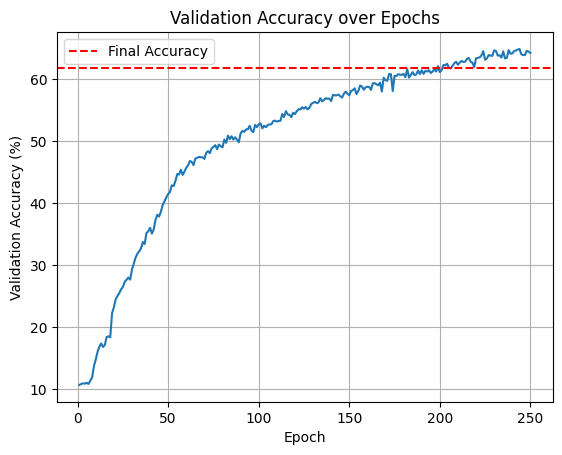

Best accuracy: 64.86% at epoch 243


In [3]:
import matplotlib.pyplot as plt

accuracies = [10.7, 10.85, 10.96, 10.9, 11.05, 10.86, 11.4, 11.9, 13.73, 14.81, 16.03, 16.87, 17.39, 16.82, 17.13, 18.42, 18.54, 18.37, 22.25, 23.2, 24.52, 25.03, 25.52, 26.11, 26.5, 27.34, 27.64, 28.01, 27.67, 29.3, 30.23, 31.23, 31.84, 32.24, 32.7, 33.74, 33.41, 35.18, 35.46, 36.03, 35.09, 35.76, 37.31, 38.13, 37.85, 38.65, 39.74, 40.32, 40.95, 41.48, 41.81, 42.87, 42.76, 43.58, 44.7, 44.61, 45.38, 44.55, 45.1, 45.72, 46.09, 46.8, 46.64, 46.13, 47.18, 47.3, 47.45, 47.38, 47.41, 47.13, 48.11, 48.39, 48.06, 48.84, 49.07, 49.34, 48.7, 49.44, 49.2, 48.99, 50.24, 49.72, 50.88, 50.33, 50.78, 50.25, 50.61, 50.24, 49.81, 51.26, 51.65, 51.49, 51.89, 51.91, 52.47, 51.69, 51.46, 52.61, 52.26, 52.72, 52.87, 52.05, 52.48, 52.24, 52.6, 52.7, 52.71, 53.23, 53.3, 53.14, 53.24, 53.28, 54.37, 53.88, 54.82, 54.3, 54.24, 53.86, 54.58, 54.36, 54.82, 55.15, 55.11, 55.46, 55.25, 55.5, 55.11, 55.37, 55.98, 56.17, 56.33, 56.13, 56.22, 56.91, 56.4, 56.64, 56.92, 56.82, 56.87, 56.45, 57.46, 57.38, 57.38, 57.51, 57.24, 57.01, 57.6, 57.98, 57.64, 57.38, 58.08, 58.23, 58.5, 57.58, 58.09, 58.97, 58.8, 58.29, 58.66, 58.76, 58.73, 58.25, 59.31, 59.34, 59.18, 59.0, 59.41, 57.99, 60.22, 59.81, 59.72, 60.82, 60.79, 58.07, 60.51, 60.49, 60.79, 60.72, 60.67, 60.83, 60.32, 61.6, 60.24, 60.69, 61.12, 60.64, 60.74, 61.39, 60.81, 61.42, 60.84, 61.33, 61.21, 61.44, 60.98, 61.21, 61.56, 61.22, 62.08, 61.13, 61.43, 62.28, 62.21, 62.47, 61.88, 61.7, 62.14, 62.55, 62.8, 62.31, 62.66, 62.92, 62.75, 62.81, 63.25, 63.41, 62.8, 62.66, 61.94, 63.34, 63.42, 63.5, 63.81, 64.5, 63.12, 63.32, 63.88, 63.77, 63.75, 64.63, 64.54, 63.78, 63.84, 63.46, 64.47, 63.33, 63.42, 64.67, 64.09, 64.12, 64.51, 64.6, 64.74, 64.86, 64.0, 63.87, 63.87, 64.56, 64.42, 64.21]  # your full list
epochs = list(range(1, len(accuracies)+1))

plt.plot(epochs, accuracies)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy (%)")
plt.title("Validation Accuracy over Epochs")
plt.axhline(y=61.85, color='r', linestyle='--', label='Final Accuracy')
plt.legend()
plt.grid(True)
plt.show()

best_epoch = max(enumerate(accuracies), key=lambda x: x[1])
print(f"Best accuracy: {best_epoch[1]}% at epoch {best_epoch[0]}")
